 # Main project path

In [1]:
path_to_project="/home/martalo/Documentos/TFM/GPCR_variants"

# Import packages

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install bioservices
!{sys.executable} -m pip install biopython

from common_functions import *

/home/martalo/miniconda3/envs/my_new_env_name/lib/python3.6/site-packages/htmd/versionwarnings.py:29: UserWarning: As of HTMD 1.16 the default ACEMD version for all protocols has changed to version 3. If you want to use version 2 protocols change the _version argument in the protocols or add `config(acemdversion=2)` to the beginning of your scripts. To disable this warning run once: `from htmd import _disableWarnings; _disableWarnings('1.16');`
  , UserWarning)
/home/martalo/miniconda3/envs/my_new_env_name/lib/python3.6/site-packages/htmd/versionwarnings.py:33: UserWarning: As of HTMD 1.16 the default number of threads HTMD spawns for calculations is set to 1. You can enable parallelism at your own risk using `config(njobs=-2)` in the beginning of your scripts. To disable this warning run once: `from htmd import _disableWarnings; _disableWarnings('1.16');`
  , UserWarning)


ffevaluate module is in beta version

Please cite HTMD: Doerr et al.(2016)JCTC,12,1845. https://dx.doi.org/10.1021/acs.jctc.6b00049

HTMD Documentation at: https://www.htmd.org/docs/latest/



2020-10-09 11:39:14,498 - binstar - INFO - Using Anaconda API: https://api.anaconda.org


New devel HTMD version (1.23.2 python[3.7,<3.8.0a0,3.6,<3.7.0a0]) is available. You are currently on (1.19).There are several methods to update:    - Create a new conda env. using `conda create -n htmd1.23.2 htmd=1.23.2 -c acellera -c psi4 -c conda-forge`    - Create a brand new conda installation and run `conda install htmd -c acellera -c psi4 -c conda-forge`    - Run: `conda update htmd -c acellera -c psi4 -c conda-forge` (NOT RECOMMENDED)



In [3]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import urllib

In [4]:
import mdtraj as md
import itertools
config(viewer='webgl')
from create_csv import * # this file is from Code/create_csv.py
import requests
import os
from matplotlib.ticker import FormatStrFormatter

# Functions

In [5]:
def sort_gnum(gnum_li):
    '''Creates a sorted list given a list from the binding site of a PDB'''
    sorted_gnum_li=[]
    for helix in range(1,9):
        helix_li=[gnum for gnum in gnum_li if gnum.startswith(str(helix)+"x")]# if item in list starts with 1x,2x,...9x is stored in helix_li
        sorted_gnum_li+=sorted(helix_li)
        interhelix_li=[gnum for gnum in gnum_li if gnum.startswith(str(helix)+ str(helix+1)+"x")] #if item in list starts with 12x,23x,...910x
        sorted_gnum_li+=sorted(interhelix_li)
    return(sorted_gnum_li)

In [6]:
d={'CYSF': 'C', 'OLS': 'S', 'HE6': 'H', 'HEX': 'H', 'CCY0': 'C', 'TRP': 'W', 'TYR': 'Y', 'HEJ': 'H', 'CCY1': 'C', 'CM2L': 'K', 'HDY': 'H', 'HEB': 'H', 'CYSL': 'C', 'NCY4': 'C', 'ASN1': 'N', 'DAB': 'X', 'CCY6': 'C', 'HE4': 'H', 'CYX': 'C', 'CH2E': 'H', 'ARGN': 'R', 'CSEP': 'S', 'HES': 'H', 'ASPH': 'D', 'LYSH': 'K', 'HEG': 'H', 'CCYM': 'C', 'NASH': 'D', 'HDQ': 'H', 'GLYM': 'G', 'OLP': 'P', 'HD9': 'H', 'HS2': 'H', 'HSE': 'H', 'NCY8': 'C', 'HEL': 'H', 'HID': 'H', 'CY0': 'C', 'PTR': 'T', 'HEI': 'H', 'HEY': 'H', 'HD3': 'H', 'M2L': 'K', 'Y1P': 'Y', 'NPTR': 'T', 'HSC': 'H', 'HDT': 'H', 'NY1P': 'Y', 'MELE': 'L', 'NCY6': 'C', 'NCCS': 'C', 'CY7': 'C', 'LYS': 'K', 'ILE': 'I', 'HEC': 'H', 'CHYP': 'P', 'HEH': 'H', 'CT2P': 'T', 'KCX': 'K', 'NCY1': 'C', 'CH2D': 'H', 'NM3L': 'K', 'CACK': 'K', 'CM3L': 'K', 'ACK': 'K', 'HISA': 'H', 'HEU': 'H', 'CCY4': 'C', 'ALY': 'K', 'CASH': 'D', 'HDK': 'H', 'CCME': 'C', 'NH1E': 'H', 'HDH': 'H', 'HIS2': 'H', 'ASP': 'D', 'NCY3': 'C', 'LSN': 'K', 'HD7': 'H', 'CNLN': 'N', 'HISE': 'H', 'CS1P': 'S', 'CY8': 'C', 'NOLP': 'P', 'HSD': 'H', 'SEP': 'S', 'COLT': 'T', 'HD8': 'H', 'CSRM': 'R', 'NM2L': 'K', 'CS2P': 'S', 'HDD': 'H', 'COLS': 'S', 'HEZ': 'H', 'NCYX': 'C', 'GLUP': 'E', 'HDE': 'H', 'NTPO': 'T', 'HDS': 'H', 'NS2P': 'S', 'CCS': 'C', 'NLE': 'L', 'CY2P': 'Y', 'CY3': 'C', 'HIN': 'H', 'ASP1': 'A', 'H2E': 'H', 'HISH': 'H', 'NCY9': 'C', 'MGY': 'G', 'CH1D': 'H', 'NSRM': 'R', 'CCY9': 'C', 'NDAB': 'X', 'NNLN': 'N', 'CY6': 'C', 'CYSG': 'C', 'CHIP': 'H', 'SER': 'S', 'CDRM': 'R', 'OLT': 'T', 'LYN': 'K', 'GLY': 'G', 'NH2D': 'H', 'PHEU': 'F', 'ASN': 'N', 'HET': 'H', 'HDO': 'H', 'HD4': 'H', 'HEE': 'H', 'HE7': 'H', 'DHSE': 'H', 'HE3': 'H', 'CDAB': 'X', 'MLYS': 'K', 'NLN': 'N', 'HEP': 'H', 'MLEU': 'L', 'Y2P': 'Y', 'CGUP': 'E', 'NT2P': 'T', 'CY9': 'C', 'T1P': 'T', 'HIS1': 'H', 'HDV': 'H', 'HDB': 'H', 'HIS': 'H', 'HEM': 'H', 'HDX': 'H', 'M3L': 'K', 'HDW': 'H', 'HDZ': 'H', 'GLUH': 'E', 'GLH': 'E', 'MEVA': 'V', 'SERD': 'S', 'CHID': 'H', 'DRM': 'R', 'HEO': 'H', 'CKCX': 'K', 'NCY0': 'C', 'HEF': 'H', 'CCY5': 'C', 'NCY7': 'C', 'NHYP': 'P', 'NY2P': 'Y', 'HE0': 'H', 'CMLY': 'K', 'MVAL': 'V', 'H2D': 'H', 'SRM': 'R', 'HDC': 'H', 'NT1P': 'T', 'NHID': 'H', 'CARM': 'R', 'HE5': 'H', 'TPO': 'T', 'HDU': 'H', 'LEU': 'L', 'GLU': 'E', 'CTPO': 'T', 'HEK': 'H', 'HE2': 'H', 'MEL': 'L', 'S2P': 'S', 'HDN': 'H', 'CGU': 'E', 'HD5': 'H', 'HD6': 'H', 'AP1': 'D', 'S1P': 'S', 'DHSP': 'H', 'NACK': 'K', 'GLN': 'Q', 'NARM': 'R', 'NCY2': 'C', 'CYS': 'C', 'ARG': 'R', 'HYP': 'P', 'CY1': 'C', 'NHIN': 'H', 'CYSH': 'C', 'HD0': 'H', 'NLYN': 'K', 'NHIP': 'H', 'CY5': 'C', 'CH1E': 'H', 'HDL': 'H', 'HEA': 'H', 'NDRM': 'R', 'NCME': 'C', 'NCYM': 'C', 'CY2': 'C', 'CHIN': 'H', 'HDR': 'H', 'COLP': 'P', 'CCYX': 'C', 'CGLH': 'E', 'MEV': 'V', 'CYS2': 'C', 'HER': 'H', 'HEW': 'H', 'HEQ': 'H', 'HED': 'H', 'ZAFF': 'D', 'HISP': 'H', 'HISD': 'H', 'NGLH': 'E', 'HEV': 'H', 'HDJ': 'H', 'CY1P': 'Y', 'HDM': 'H', 'CY4': 'C', 'THR': 'T', 'NMLY': 'K', 'HDI': 'H', 'MLY': 'K', 'HEN': 'H', 'NSEP': 'S', 'H1D': 'H', 'MET': 'M', 'HIE': 'H', 'NKCX': 'K', 'HD1': 'H', 'NOLT': 'T', 'T2P': 'T', 'ALA': 'A', 'HD2': 'H', 'DHSD': 'H', 'HDP': 'H', 'CYM': 'C', 'HDF': 'H', 'HDA': 'H', 'NS1P': 'S', 'CHIE': 'H', 'CLYN': 'K', 'HISB': 'H', 'ARM': 'R', 'CT1P': 'T', 'CPTR': 'T', 'HSP': 'H', 'CME': 'C', 'HE1': 'H', 'CYSD': 'C', 'PHE': 'F', 'NH2E': 'H', 'CCY3': 'C', 'NH1D': 'H', 'NCY5': 'C', 'PRO': 'P', 'HIP': 'H', 'NHIE': 'H', 'ASPP': 'D', 'CCCS': 'C', 'HE8': 'H', 'VAL': 'V', 'HE9': 'H', 'CYSP': 'C', 'NOLS': 'S', 'CCY2': 'C', 'CCY7': 'C', 'ASH': 'D', 'TRPU': 'W', 'CCY8': 'C', 'HDG': 'H', 'H1E': 'H','CYS':'C', 'ASP':'D', 'SER':'S', 'GLN':'Q', 'LYS':'K', 'ILE':'I', 'PRO':'P', 'THR':'T', 'PHE':'F', 'ASN':'N', 'GLY':'G', 'HIS':'H', 'LEU':'L', 'ARG':'R', 'TRP':'W', 'ALA':'A', 'VAL':'V', 'GLU':'E', 'TYR':'Y', 'MET':'M', 'DCYS':'C', 'DASP':'D', 'DSER':'S', 'DGLN':'Q', 'DLYS':'K', 'DILE':'I', 'DPRO':'P', 'DTHR':'T', 'DPHE':'F', 'DASN':'N', 'DGLY':'G', 'DHIS':'H', 'DLEU':'L', 'DARG':'R', 'DTRP':'W', 'DALA':'A', 'DVAL':'V', 'DGLU':'E', 'DTYR':'Y', 'DMET':'M', 'CCYS':'C', 'CASP':'D', 'CSER':'S', 'CGLN':'Q', 'CLYS':'K', 'CILE':'I', 'CPRO':'P', 'CTHR':'T', 'CPHE':'F', 'CASN':'N', 'CGLY':'G', 'CHIS':'H', 'CLEU':'L', 'CARG':'R', 'CTRP':'W', 'CALA':'A', 'CVAL':'V', 'CGLU':'E', 'CTYR':'Y', 'CMET':'M', 'NCYS':'C', 'NASP':'D', 'NSER':'S', 'NGLN':'Q', 'NLYS':'K', 'NILE':'I', 'NPRO':'P', 'NTHR':'T', 'NPHE':'F', 'NASN':'N', 'NGLY':'G', 'NHIS':'H', 'NLEU':'L', 'NARG':'R', 'NTRP':'W', 'NALA':'A', 'NVAL':'V', 'NGLU':'E', 'NTYR':'Y', 'NMET':'M'}
def useline2(line):
    '''returns True if line starts with ATOM, or HETATM with a resname included in the dictionary''' 
    if line.startswith('ATOM') or line.startswith('HETATM'):
        trykey=line[17:21]
        trykey=trykey.strip()
        if trykey in d.keys():
            return True
        else:
            return False #this heteroatom is not useful
    else:
        return False

In [7]:
def obtain_all_chains(pdb_name):
    '''Reads a pdb file and returns all the different chain names without repetition in a list'''
    chain_name_l=[]
    fpdb=open(pdb_name,'r')
    first=True
    for line in fpdb:
        if line.startswith('ATOM') or line.startswith('HETATM'):
            chain_name=line[21]
            if first:
                first=False
                chain_name_pre=chain_name
                chain_name_l.append(line[21])
            elif (chain_name != chain_name_pre):
                chain_name_pre=chain_name
                chain_name_l.append(line[21])
    return list(chain_name_l)

In [98]:
def obtain_binding_site(pdb_filepath,res_sel,gpcr_sel,threshold=4):
    '''Creates a list with the 'Residue Sequence record, that is the index of mdtraj, and chain' 
    of each residue that interacts/is-closer-than below the threshold between ligand-GPCR'''
    struc=md.load(pdb_filepath) # resulting trajectory, as an md.Trajectory object
    chain_name_li=obtain_all_chains(pdb_filepath)# store in the list the chains of the pdb
    
    #ligand
    lig_sel=struc.topology.select(res_sel) # select only the 'res_sel' ATOM indexes, that is the ligand, of the topology object
    lig_res=[residue.index for residue in struc.atom_slice(lig_sel).topology.residues]# list of RES index of the selected residues
    all_lig_res=lig_res
    
    #prot
    gpcr_sel=struc.topology.select(gpcr_sel) 
    gpcr_res=[residue.index for residue in struc.atom_slice(gpcr_sel).topology.residues]
    pairs = list(itertools.product(gpcr_res, all_lig_res)) # cartesian product, equivalent to a nested for-loop
    
    (dists,allres_p)=md.compute_contacts(struc, contacts=pairs, scheme="closest") #Compute the min distance between the atoms of pairs of residues
    # dist: array frames x pairs, distances for each residue-residue contact in each frame of the trajectory
    # allres_p: array pairs x 2, indices of the residues involved in the contact
    dists=dists[0] # only test distance between residues for the first frame?
    i=0
    binding_site=[]
    while i < len(dists):
        if dists[i]*10 < threshold: # dist*10< 4
            res_ind=allres_p[i][0]# just considers the GPCR residues ???
            res_topo=struc.topology.residue(res_ind)
            res_pdb=res_topo.resSeq
            res_chain_ind=res_topo.chain.index
            res_name=res_topo.name
            res_chain=chain_name_li[res_chain_ind]
            binding_site.append([res_pdb,res_chain])
        i+=1
    return binding_site

def create_color_scale(fileInput):
    '''Use the colors from http://www.perbang.dk/rgbgradient/ copied
    into a file to build a list of colors'''
    colorscale=[]
    fileRead=open(fileInput,'r')
    for line in fileRead:
        if len(line)>4:
            new_col="#"+line[0:-1]
            colorscale.append(new_col)
    return(colorscale)

def var_to_display_in_file(wanted_gnum,ex_gpcr="HRH2",define_pdb=False,gnum_type="gpcrdb"):#test if works
    #ex_gpcr="CCR8"
    '''Build a list of variants of the introduced GPCR in ex_gpcr, if they are in the 'wanted_gnum'
    posion and if they are non-homolous (changes the aa type)'''
    dictpath="/home/martalo/Documentos/TFM/GPCR_variants/Results/gpcr_to_pdb/"
    print(ex_gpcr)
    (var_info,all_gpcrs)=var_pos_in_pdb()# read all the variants affecting each of the GPCRs in the file /home/martalo/Documentos/TFM/GPCR_variants/Results/studied_GPCR_vars/myprot_list_strucNvar.csv
    
    if define_pdb:# by default False
        pdbname=define_pdb # read the pdb name if given
    else: # the case by default
        if "pdb" in var_info[ex_gpcr].keys(): #take the pdb name
            pdbname=var_info[ex_gpcr]["pdb"]
        else:
            print("No pdb found for %s"%ex_gpcr)
            return False
    # obtain the GPCRnum
    json_filename=pdbname+"_conv.json" 
    gpcr_pdbaa_ok=gpcr_pdb_dict_fom_json(dictpath+json_filename,gnum_type=gnum_type)

    var_for_gpcr_d={}
    for this_var in var_info[ex_gpcr]["vars"]:#iterate over the variants of the GPCR
        gnum=this_var["gpcrdb"]
        seqpos=this_var["seqN"] # ¿?¿
        if gnum:# test if the variant is the wanted position
            gnum_ok=gnum_all_to_one(gnum_type,gnum)
            if gnum_ok in gpcr_pdbaa_ok and gnum_ok==wanted_gnum:
                if check_aa_type_changed(this_var['wt_aa'],this_var['var_aa'])=="changed":
                    print(this_var)
                    return (this_var)
            else:
                continue
        elif seqpos in gpcr_pdbaa_ok:
            #print('second if')
            continue
        else:
            #print('third if')
            continue

Binding site of Risperidone on D2R
==================
Risperidone is an antipsycotic for schizophrenia and bipolar disorder. It is thought to be caused by an excess of dopaminergic D2 and serotonergic 5-HT2A activity. Risperidone binds with a very high affinity to 5-HT2A receptors, approximately 10-20 fold greater than the drug's binding affinity to D2 receptors. 
1st I study the residues of the binding pocket of Risperidone in the receptor D2R (a class-A GPCR dopamine D2 receptor) as example / case study. Later I will check which residues are included in the binding pocket of all considered GPCRs and use this for the study.

Obtaining binding site of Risperidone on D2R
---------------------------------------------------

The topology of mdtraj generates a new residue numeration different from the one of the pdb file. In this case, the receptor have indexes from 0 to 422, and the ligand Risperidone has the index 423.

In [9]:
pdbname="6CM4" # Structure of the D2 Dopamine Receptor Bound to the Atypical Antipsychotic Drug Risperidone
pdb_path=os.path.join(path_to_project,"Data/pdb_files/")
pdb_filepath=pdb_path+pdbname+".pdb"
res="8NU"
# Compute binding site of D2R, 6CM4-pdb:
# ligand: resname 8NU
# GPCR: protein, D2R, only one chain 'A'
binding_site=obtain_binding_site(pdb_filepath,"resname '"+res+"'","protein")

The binding pocket of the D2R (defining a contact between ligand-receptor as a distance between two atoms of the residues rec-lig below 4 angstroms):

In [10]:
print(binding_site) # res index, with mdtraj new numeration, and chain of the binding pocket, it is not taking the index of the Risperidone

[[100, 'A'], [110, 'A'], [114, 'A'], [115, 'A'], [118, 'A'], [119, 'A'], [122, 'A'], [193, 'A'], [197, 'A'], [198, 'A'], [382, 'A'], [386, 'A'], [389, 'A'], [390, 'A'], [408, 'A'], [412, 'A'], [416, 'A']]


Representation of binding site of risperidone on D2R
-------------------------------------------------------------

Linked with VMD, rediues closer to 4A to the ligand (all atoms taken into account) are considered to interact. This works with htmd, https://software.acellera.com/docs/stable/htmd/tutorials/visualization.html. Open D2R in newcartoon in white and the residues of the binding site in licorice blue.

In [11]:
# bs stands for bindig site, bs_sel gathers all the residues of the list binding_site for D2R
bs_sel=" or "    .join([ "resid %s and chain %s" % (str(pos),chain)  for pos,chain in binding_site])
mol = Molecule(pdb_filepath)
gpcr_sel="protein and chain A"
mol.reps.add(sel=gpcr_sel,color="#f4f8ff",style='NewCartoon') # GPCR (no lig) in white newcartoon
mol.reps.add(sel=bs_sel,color="#3875B1",style='licorice')# binding site in blue licorice
mol.view()



_ColormakerRegistry()

NGLWidget()

GPCR num. of binding site positions of D2R
--------------------------------------------------
I assign the GPCR residue numbering (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4408928/) to each residue of D2R to be able to compare it with other GPCRs.

In [12]:
def gpcrpdb_to_pdbgpcr(gpcr_pdbaa):
    ''' Given a dictionary with the pdb data of a GPCR, coming from the corresponding
    json file, builds a dictionary: keys as positions and XxY as values of the structure'''
    pdb_gpcr={} # dict that will be filled and returned
    for gnum,pdbpos in gpcr_pdbaa.items():#iteration over the data of the pdb data in the dictionary
        # each item is a dictionary as well
        # the keys (gnum) are X.ZxY, example '4.48x48', and the values (pdbpos) are another dictionary 
        # with the information of the structure, as an example, {'chain': 'A', 'pos': '158', 'aa': 'I'}
        if "." in gnum or "x" in gnum:
            gnum=gnum_all_to_one("gpcrdb",gnum) # returns an string 'XxY', example 4x48
            pdb_gpcr[int(pdbpos["pos"])]=gnum
     #return dictionary, keys are integers with the position and values are the string (XxY)
    return pdb_gpcr

In [13]:
#dictpath="/home/martalo/Documentos/TFM/GPCR_variants/Pharmacogenomics/Results/gpcr_to_pdb/"
dictpath=os.path.join(path_to_project,"Results/gpcr_to_pdb/") # folder where the downloaded json files are

json_filename=pdbname+"_conv.json" # select the 6CM4_conv.json file with the strucure
gpcr_pdbaa=open_json(dictpath+json_filename)# returns a python dictionary from the json file
print('The dictionary with the pdb structure',gpcr_pdbaa)
pdb_gpcr=gpcrpdb_to_pdbgpcr(gpcr_pdbaa) # Dictionary: keys with positions and values XxY
print('The dictionary returned by gpcrpdb_to_pdbgpcr() for D2R is: ', pdb_gpcr)

# Now filter the dictionary to only keep the binding site data
# In the list binding_site_gnum there will be stored the values 'XxY' for the keys 'pos'
# for all the positions of the binding site of D2R
binding_site_gnum=[pdb_gpcr[pos] for pos,chain in binding_site if pos in pdb_gpcr]
if len(binding_site)!=len(binding_site_gnum):
    print("%i positions not considered due to lack of GPCR num."% (len(binding_site)-len(binding_site_gnum)))

The dictionary with the pdb structure {'1.38x38': {'aa': 'L', 'pos': '40', 'chain': 'A'}, '7.33x32': {'aa': 'V', 'pos': '406', 'chain': 'A'}, '3.38x38': {'aa': 'A', 'pos': '120', 'chain': 'A'}, '2.47x47': {'aa': 'A', 'pos': '77', 'chain': 'A'}, '4.57x57': {'aa': 'S', 'pos': '167', 'chain': 'A'}, '12.51x51': {'aa': 'Q', 'pos': '66', 'chain': 'A'}, '2.45x45': {'aa': 'S', 'pos': '75', 'chain': 'A'}, '7.55x55': {'aa': 'T', 'pos': '428', 'chain': 'A'}, '4.52x52': {'aa': 'L', 'pos': '162', 'chain': 'A'}, '3.31x31': {'aa': 'L', 'pos': '113', 'chain': 'A'}, '1.44x44': {'aa': 'A', 'pos': '46', 'chain': 'A'}, '2.59x58': {'aa': 'P', 'pos': '89', 'chain': 'A'}, '2.57x56': {'aa': 'V', 'pos': '87', 'chain': 'A'}, '4.41x41': {'aa': 'R', 'pos': '151', 'chain': 'A'}, '5.44x45': {'aa': 'I', 'pos': '195', 'chain': 'A'}, '176': {'aa': 'N', 'pos': '176', 'chain': 'A'}, '4.62x63': {'aa': 'F', 'pos': '172', 'chain': 'A'}, '1.56x56': {'aa': 'A', 'pos': '58', 'chain': 'A'}, '7.47x47': {'aa': 'A', 'pos': '420',


The dictionary returned by gpcrpdb_to_pdbgpcr() for D2R is:  {40: '1x38', 406: '7x32', 120: '3x38', 77: '2x47', 167: '4x57', 66: '12x51', 75: '2x45', 428: '7x55', 162: '4x52', 113: '3x31', 46: '1x44', 89: '2x58', 87: '2x56', 151: '4x41', 195: '5x45', 172: '4x63', 58: '1x56', 420: '7x47', 412: '7x38', 194: '5x44', 128: '3x46', 379: '6x41', 437: '8x54', 118: '3x36', 112: '3x30', 430: '8x47', 109: '3x27', 435: '8x52', 191: '5x41', 158: '4x48', 88: '2x57', 54: '1x52', 96: '2x65', 102: '23x52', 414: '7x40', 133: '3x51', 192: '5x42', 67: '2x37', 65: '12x50', 198: '5x47', 206: '5x55', 45: '1x43', 55: '1x53', 200: '5x49', 199: '5x48', 86: '2x551', 80: '2x50', 95: '2x64', 189: '5x39', 378: '6x40', 64: '12x49', 48: '1x46', 97: '2x66', 219: '5x68', 442: '8x59', 111: '3x29', 114: '3x32', 82: '2x52', 439: '8x56', 171: '4x62', 53: '1x51', 184: '45x52', 62: '1x60', 424: '7x51', 121: '3x39', 156: '4x46', 130: '3x48', 145: '34x56', 152: '4x42', 135: '3x53', 374: '6x36', 173: '4x64', 202: '5x51', 203: 

In [14]:
binding_site_d2r=binding_site # store the list with positions-chain of the binding pocket of D2R
binding_site_d2r_gnum=binding_site_gnum # store the gnum -> the XxY coming from the json files
print('Binding site, index and chain, list of D2R:', binding_site_d2r)
print('Binding site list, GPCR num., of D2R:',binding_site_d2r_gnum)

Binding site, index and chain, list of D2R: [[100, 'A'], [110, 'A'], [114, 'A'], [115, 'A'], [118, 'A'], [119, 'A'], [122, 'A'], [193, 'A'], [197, 'A'], [198, 'A'], [382, 'A'], [386, 'A'], [389, 'A'], [390, 'A'], [408, 'A'], [412, 'A'], [416, 'A']]
Binding site list, GPCR num., of D2R: ['23x50', '3x28', '3x32', '3x33', '3x36', '3x37', '3x40', '5x43', '5x461', '5x47', '6x44', '6x48', '6x51', '6x52', '7x34', '7x38', '7x42']


So, in the first list there are the positions of the residues of the binding site of D2R and, in the second list, there are the XxY values of the residues of the binding site. Example, in the dictionary returned by the function  gpcrpdb_to_pdbgpcr(), the key (position) '100' has the value (XxY) '23x50', and key '110', '3x28'.

Binding site positions of all human GPCRs 
======================

I take human Aminergic GPCRs that are crystalized with an orthosteric ligand (In Hauser et al 2018 they took all chordates, that is including all vertebrates).
 I discard peptide and peptide-like ligands. They will be downloaded in json format, that is why we will need to transform the files into Python dictionaries using the 'loads()' function.

In [15]:
all_struc=requests.get('http://gpcrdb.org/services/structure/').json()
mystrucli=[mystruc for mystruc in all_struc if (mystruc["species"]=='Homo sapiens' and len(mystruc["ligands"]))>0 and mystruc["family"].startswith("001_001") ]
pdb_path=os.path.join(path_to_project,"Data/pdb_files/")

len(mystrucli) # total number of downloaded GPCRS in json format
i=0 # print the first item as an example
for struc_info in mystrucli:
    while i<2:
        print(struc_info,'\n')
        
        i+=1

{'pdb_code': '6OIK', 'protein': 'acm2_human', 'family': '001_001_002_002', 'species': 'Homo sapiens', 'preferred_chain': 'R', 'resolution': 3.6, 'publication_date': '2019-05-08', 'type': 'Electron microscopy', 'state': 'Active', 'distance': 8.54, 'publication': 'http://dx.doi.org/10.1126/SCIENCE.AAW5188', 'ligands': [{'name': 'Iperoxo', 'type': 'small molecule', 'function': 'Agonist'}, {'name': 'LY2119620', 'type': 'small molecule', 'function': 'PAM'}]} 

{'pdb_code': '6OIK', 'protein': 'acm2_human', 'family': '001_001_002_002', 'species': 'Homo sapiens', 'preferred_chain': 'R', 'resolution': 3.6, 'publication_date': '2019-05-08', 'type': 'Electron microscopy', 'state': 'Active', 'distance': 8.54, 'publication': 'http://dx.doi.org/10.1126/SCIENCE.AAW5188', 'ligands': [{'name': 'Iperoxo', 'type': 'small molecule', 'function': 'Agonist'}, {'name': 'LY2119620', 'type': 'small molecule', 'function': 'PAM'}]} 



In [16]:
# to be sent to Mariona and compute the 'pdbname_conv' files
def write_list_PDB_uniprot(filename, json_list ):
    '''Create a filename with two columns: PDB name and Uniprot entry name to be used to download the _conv.json
    of a json list'''
    
    with open(os.path.join(currentdir,filename), 'w') as outfile:
        outfile.write('PDB name\t Uniprot Id\n')
        for struc_info in json_list: # iteration over all the downloaded and filtered GPCRs (jsons)
            pdbname=struc_info["pdb_code"]
            uniprotname=struc_info["protein"]
            outfile.write("%s \t\t %s\n" % (pdbname, uniprotname))
    outfile.close()

write_list_PDB_uniprot('protein_BS_list.txt', mystrucli)

Now we filter the ligands, the resulting set will be used to compute the residues forming the binding site (the horizontal axis in the heatmaps).

In [17]:
#filter out allosteric ligands
for struc in mystrucli:
    lig_li=struc["ligands"]
    for l in lig_li:
        if l["function"]=="NAM" or l["function"]=="PAM" or l["type"]!= 'small molecule':
            #if l["type"]!= "small molecule":
            lig_li.remove(l)
    if len(lig_li)==0:
        mystrucli.remove(struc)
print("%s structures found" % len(mystrucli))

76 structures found


In [18]:
def obtain_prot_chains(pdb_name):
    '''Given a pdb, read it and returns a list with the lines corresponding to ATOM/HET
    only conisders the usefull data from the pdb file, the structure information'''
    chain_name_s=set()
    fpdb=open(pdb_name,'r')
    for line in fpdb:
        if useline2(line): # True if the line is of one valid atom/heteroatom
            chain_name_s.add(line[21])
    return list(chain_name_s)

### Obtain the PDB structure of the GPCRs and the ligands
The pdb files will be stored in the folder "Data/pdb_files/", the pdb names of the GPCRs are taken from the json dictionary of the GPCR family that has been downloaded.

Then, selection of residues in the binding pocket of the GPCR of our dataset: to detect the ligand binding pocket of each PDB structure we can consider the ligand as 'non-protein residue closer than 5Å to the GPCR residue Asp 3.32'. This residue is selected because all opioid receptors have the same aspartate residue, which is also fully conserved in aminergic receptors; in both families the acidic side chain of Asp3.32 serves as a major salt bridge anchor critical for ligand binding and receptor activation.

** The original code donwloaded the non-existing pdbs in a folder called 'New' inside Data/pdb_files, the only two pdbs existing in Data/pdb_files were 4IAQ.pdb and 6CM4.pdb. That was because there is part of the code using the lab db and server non-available to download the pdbs and creating a file 'pdbname_conv.json' with the translation GPCR numeration <-> pdb numeration for the residues. That file is used then to compute the residues forming the binding site.

In [19]:
orth_res_gpcrs={}
pdb_uprot={}
pdb_path=os.path.join(path_to_project,"Data/pdb_files/")# pdb files -> info of the structure
dictpath=os.path.join(path_to_project,"Results/gpcr_to_pdb/") # json files -> _conv.json, conversion pdbcoor <-> gnum
for struc_info in mystrucli: # iteration over all the downloaded and filtered GPCRs (jsons)
    pdbname=struc_info["pdb_code"]# get the pdb name from the json info
    pdb_filepath=pdb_path+pdbname+".pdb" # where the the pdb file structure will be stored
    
    #if the pdb does not exist in "Results/gpcr_to_pdb/", download it in "Results/gpcr_to_pdb/new"
    #if not os.path.isfile(pdb_filepath):
    #    print("- %s not found, downloaded. Skipping computation for now.." % pdbname)
    #    pdb_uprot[pdbname]= struc_info["protein"]
    #    urllib.request.urlretrieve('http://files.rcsb.org/download/'+pdbname+".pdb", pdb_path+"new/"+pdbname+".pdb")
    #    continue # The continue statement continues with the next iteration of the loop!

    #Finding residue Asp3x32 in each GPCR -> using the json notation 
    json_filename=pdbname+"_conv.json" # json file of the corresponding GPCR
    gpcr_pdbaa=gpcr_pdb_dict_fom_json(dictpath+json_filename) # Opens the json file and returns a dictionary, keys as the gnum 'helix x dbnum' and value as the items of the json file
    
    if pdbname!= "5JQH" and pdbname!="6MXT": # pdbs with worng alignement
    
    # Store position and chain of Asp3x32
        pos=gpcr_pdbaa["3x32"]["pos"]
        chain=gpcr_pdbaa["3x32"]["chain"]
    #asp3x32="chain %s and resid %s" % (chain,pos)
    #asp3x32="protein and resid %s" % (pos)

    # Finding ligand as the non-protein residue closer than 5Å to the GPCR residue Asp3x32 -> using pdb file
        struc=md.load(pdb_filepath) # open the pdb file
        chain_name_li=obtain_all_chains(pdb_filepath) # only get the important lines
    # select the residues that are not protein nor water in the pdb
        lig_sel0=struc.topology.select("not protein and not water")
        lig_res0=set([residue.name for residue in struc.atom_slice(lig_sel0).topology.residues])
        if len(lig_res0)>1:
        #ligres_sel=["resname %s" % myres for myres in lig_res0]
        #ligres_sel_s=" or ".join(ligres_sel)
        #lig_sel=struc.topology.select(ligres_sel_s)
        # the ligand as a list of the resultig indexes
            lig_res=[residue.index for residue in struc.atom_slice(lig_sel0).topology.residues]

            gpcr_sel=struc.topology.select("residue %s and chainid %s" % (pos,str(chain_name_li.index(chain)))) 
            gpcr_res=[residue.index for residue in struc.atom_slice(gpcr_sel).topology.residues]
            
            pairs = list(itertools.product(gpcr_res, lig_res))

            (dists,allres_p)=md.compute_contacts(struc, contacts=pairs, scheme="closest")
            dists=dists[0]
            i=0
            gpcr_lig_li=[]
            while i < len(dists):
                if dists[i]*10 < 5:
                    res_ind=allres_p[i][1]

                    res_topo=struc.topology.residue(res_ind)
                    res_pdb=res_topo.resSeq
                    res_chain_ind=res_topo.chain.index
                    res_name=res_topo.name
                    
                    gpcr_lig_li.append(res_name)
                i+=1
        else:
            gpcr_lig_li=list(lig_res0)
    # Build a dictionary, keys -> pdb name of the GPCR, value -> name of the ligand (resname), and the chain of the GPCR
        orth_res_gpcrs[pdbname]={"res_li":gpcr_lig_li,"gpcr_chain_li":struc_info["preferred_chain"].split(",")}



In [20]:
print('GPCR residue (3x32):', gpcr_res)
print('Lig residues: ', lig_res)
print('Pairs', pairs)

GPCR residue (3x32): [81]
Lig residues:  [439, 440, 441]
Pairs [(81, 439), (81, 440), (81, 441)]


PROBLEM 1: we need to download all the 76 GPCR pdbs to use them to compute the binding site of each one of them and then check the variants that are present in them. However, we donwload them in Data/pdb_files/new and we let them there without computing its BS (as there is a 'continue' statement inside the loop). That means, the dictionary that will be used to compute binding sites is only formed by two GPCRs (that, inaddition, are not in the filtered list to be downloaded).

If we copy the pdbs from 'new' into the 'correct' folder Data/pdb_files/, we get the problem that we do not have the 'pdbname_conv.json', the file that contains the dictionary converting gnum <-> pdb coordinates that is the one used to check the variants present in the GPCRs gnums. 

SOLUTION: The downloading of the pdbs and the generation of the files 'pdbname_conv.json' (used later to create dictionaries to relate the GPCR position numeration with the one of the pdbs) is done with another code using the lab DB and Server (so Mariona run that part of the code and send me all the 'pdbname_conv.json' to be copied directly in "Results/gpcr_to_pdb/", so the pdbs are not downloaded, we can comment the chunk of pdb downloading in "new" folder).

### Obtain Binding Site for each PDB
Now that all the GPCRs are downloaded and the ligands are identified, we open and parse the json for each structure as before and compute the binding site for each one, all the info will be stored in the set 'binding_site_total'.

In [21]:
binding_site_total=set()
print('Numer of iterations of dictionary',len(orth_res_gpcrs.keys()))

# iterate over the keys, pdb names, of the dictionary that stores the ligands info
for pdbname in orth_res_gpcrs.keys():    
    res_li=orth_res_gpcrs[pdbname]["res_li"]# name of the ligand
    gpcr_chain_li=orth_res_gpcrs[pdbname]["gpcr_chain_li"] # chain of the GPCR
    pdb_filepath=pdb_path+pdbname+".pdb"
    
    res_sel=" or ".join(["resname '%s'" % lig for lig in res_li])# FIRST parameter
    chain_name_li=obtain_all_chains(pdb_filepath)

    # the selection of the receptors, the GPCR is based on the chain that is near the ligand
    #SECOND parameter
    gpcr_sel="protein and (%s)" % " or ".join(["chainid "+str(chain_name_li.index(chain)) for chain in gpcr_chain_li])
    #Compute binding pocket residues for a GPCR, in this case with 5 Angstroms as treshold
    mdtraj_err_list=["6OIK","4LDL","4LDO","6N48","4QKX","4LDE"]
    if pdbname not in mdtraj_err_list:
        binding_site=obtain_binding_site(pdb_filepath,res_sel,gpcr_sel,5)
    #Open the json of each GPCR
        json_filename=pdbname+"_conv.json"
        gpcr_pdbaa=open_json(dictpath+json_filename)
        pdb_gpcr=gpcrpdb_to_pdbgpcr(gpcr_pdbaa)
    # Only store in the list binding_site_gnum the XxY of the postions that are in the binding site of each GPCR
        binding_site_gnum=[pdb_gpcr[pos] for pos,chain in binding_site if pos in pdb_gpcr]
        if len(binding_site)!=len(binding_site_gnum):
            print("%s: %i positions not considered due to lack of GPCR num."% (pdbname,len(binding_site)-len(binding_site_gnum)))
    # Fill the set with the info of the binding site of each GPCR
        binding_site_total=binding_site_total | set(binding_site_gnum)


Numer of iterations of dictionary 74
5ZKB: 1 positions not considered due to lack of GPCR num.
2RH1: 1 positions not considered due to lack of GPCR num.
3NY9: 1 positions not considered due to lack of GPCR num.
5TUD: 2 positions not considered due to lack of GPCR num.
3RZE: 2 positions not considered due to lack of GPCR num.
6G79: 2 positions not considered due to lack of GPCR num.
6OL9: 1 positions not considered due to lack of GPCR num.
6BQH: 1 positions not considered due to lack of GPCR num.
4IAR: 1 positions not considered due to lack of GPCR num.
5DSG: 1 positions not considered due to lack of GPCR num.
6U1N: 7 positions not considered due to lack of GPCR num.
5ZK3: 1 positions not considered due to lack of GPCR num.
3UON: 1 positions not considered due to lack of GPCR num.
6PS0: 1 positions not considered due to lack of GPCR num.
4GBR: 1 positions not considered due to lack of GPCR num.
6OBA: 1 positions not considered due to lack of GPCR num.
5D5B: 1 positions not considered du

In [22]:
# Set of "binding site residues" in all considered GPCRs: addition of binding site residues of each structure
print('First parameter: ',res_sel )
print('Second parameter: ',gpcr_sel )
print(binding_site_total)

First parameter:  resname 'P0G'
Second parameter:  protein and (chainid 0)
{'7x37', '6x59', '5x461', '5x37', '23x49', '7x41', '3x29', '2x63', '2x53', '3x35', '6x44', '6x51', '7x35', '3x28', '7x38', '7x31', '6x48', '3x33', '6x52', '6x58', '7x39', '6x56', '3x40', '6x55', '45x50', '5x39', '45x51', '4x57', '5x36', '7x34', '4x56', '5x40', '7x30', '23x50', '2x64', '2x56', '3x37', '5x47', '6x54', '2x60', '2x59', '3x32', '3x36', '5x44', '45x52', '7x42', '5x43', '3x25'}


Now we have a set with all the positions of the binding site residues of our collection of GPCRs. As an example, let's analyse the 'HTR1B' (not a pdb name! is the gene coding 4IAQ, one of the two existing pdbs in Data/pdb_files). Check the representation.

In [23]:
gpcr="HTR1B"
(var_info,all_gpcrs)=var_pos_in_pdb() # Stores all the info of the variants of the GPCRs, 
# this works with a file containing all the known variants for different species in 
# Results/studied_GPCR_vars/myprot_list_strucNvar.csv 
# we could UPDATE this file as well
pdbname=var_info[gpcr]["pdb"] # collect the name of the pdb file of HTRB1
json_filename=pdbname+"_conv.json"
gpcr_pdb=gpcr_pdb_dict_fom_json(dictpath+json_filename) # dictionary of the structure of HTR1B

# visualize the HTR1B protein and the binding site
pdb=var_info[gpcr]["pdb"]
gpcr_sel="protein and chain A"

mypdb=pdb+".pdb"
mypdbpath=os.path.join(pdb_path,mypdb)
mol = Molecule(mypdbpath)
mol.reps.add(sel=gpcr_sel,color="#88E2FF",style='NewCartoon')

for gnum_pos in binding_site_total:
    # select the residues that corresponds to ones of its binding site
    if gnum_pos in gpcr_pdb :
        gpcr_pdb[gnum_pos]
        mysel="(resid "+gpcr_pdb[gnum_pos]["pos"]+" and chain "+gpcr_pdb[gnum_pos]["chain"]+")"
        mol.reps.add(sel=mysel ,color="#3875B1",style='licorice')  
mol.view()

NGLWidget()

We can see that we can select the residues of the binding site of any of the downloaded GPCRs using the set 'binding_site_total'.

In [24]:
binding_site_gnum=list(binding_site_total)

In [25]:
binding_site_gnum=sort_gnum(binding_site_gnum)
print(binding_site_gnum)
print(len(binding_site_gnum))

['2x53', '2x56', '2x59', '2x60', '2x63', '2x64', '23x49', '23x50', '3x25', '3x28', '3x29', '3x32', '3x33', '3x35', '3x36', '3x37', '3x40', '4x56', '4x57', '45x50', '45x51', '45x52', '5x36', '5x37', '5x39', '5x40', '5x43', '5x44', '5x461', '5x47', '6x44', '6x48', '6x51', '6x52', '6x54', '6x55', '6x56', '6x58', '6x59', '7x30', '7x31', '7x34', '7x35', '7x37', '7x38', '7x39', '7x41', '7x42']
48


After converting the set to a list, end up with this list of sorted items, that are the position of the binding sites of all the studied GPCRs.

Receptors with binding site affected
====================
Now we will check if there are variants in the computed binding site of the downloaded GPCRs. To do so we use the file Results/studied_GPCR_vars/myprot_list_strucNvar.csv. It is build with the function 'find_variants()' in Code/create_csv.py and contains a list of 46 receptors. It contains the information of the variants detected indicating the position using gnums. This info comes from the paper from Houser, Supplementary Table 4: Complete variant table of clinically relevant GPCR and functional annotations.

After 'loading' the data of the file using the function var_pos_in_pdb() in a tupple with the name of the GPCR and the infor of the rest of the columns of the csv, we use var_to_display() to create a list for each of the 46 GPCRs with the useful information of the variants affecting the GPCRs (aa changes and those things), example of the info of the first variant affecting HTR1A -> {'affected_pred': True, 'affected_items_pred': ['sift_poloP'], 'pdb_pos': {'pos': '382', 'chain': 'A', 'aa': 'K'}, 'gpcr_num': '8x56', 'aa_type_changed': True}.

In [26]:
(var_info,all_gpcrs)=var_pos_in_pdb()
# Reads the file myprot_list_strucNvar.csv that contains the info of the variants detected in the GPCRs
# var_info contains the columns organized and all_gpcrs contains the names of the GPCRs
bs_affected={}
print("Number of iterations:", len(all_gpcrs), '\n Names of the GPCRs with variants:', all_gpcrs)
for gpcr in all_gpcrs:#iterate over the GPCRs of the GPCR with variant info file
    bs_var=False
    gpcr_vars=var_to_display(ex_gpcr=gpcr,dictpath=dictpath) # list of variants in the GPCR
    #Build a list of variants of the introduced GPCR in ex_gpcr, it also stores if the variant changes the aa type or no
    if gpcr_vars: # if there are variants affecting the GPCR
        for var in gpcr_vars:
            if var["gpcr_num"] in binding_site_gnum:#check if the variants are in the list of residues of the general BS 
                bs_var=True
        if bs_var:
            bs_affected[gpcr]=gpcr_vars
print("%i of %i studied gpcrs have affected the binding site"%(len(bs_affected),len(all_gpcrs)))

Number of iterations: 46 
 Names of the GPCRs with variants: ['HTR1A', 'HTR1B', 'HTR1D', 'HTR1E', 'HTR1F', 'HTR2A', 'HTR2B', 'HTR2C', 'HTR4', 'HTR5A', 'HTR5BP', 'HTR6', 'HTR7', 'CHRM1', 'CHRM2', 'CHRM3', 'CHRM4', 'CHRM5', 'ADRA1A', 'ADRA1B', 'ADRA1D', 'ADRA2A', 'ADRA2B', 'ADRA2C', 'ADRB1', 'ADRB2', 'ADRB3', 'DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'HRH1', 'HRH2', 'HRH3', 'HRH4', 'TAAR1', 'GPR18', 'CNR2', 'MCHR1', 'CCR8', 'CXCR4', 'CX3CR1', 'FSHR', 'FFAR1', 'CALCR']
No pdb found for HTR5BP
45 of 46 studied gpcrs have affected the binding site


We have just considered the variants that are present in the BS position list. The dictionary 'bs_affected' stores the GPCRs that have variants affecting its binding site. The keys are the GPCR name and the values contain all the information of the detected variants.

PROBLEM 2: we use the variants described by Houser in 46 GPCRs and consider only their positions. Then we compare those postions with the ones forming the BS of our dataset BUT our dataset is not actually conformed by the 76 filtered pdbs (human, aminergic, with small orthosteric ligands) but only obtained with two pdbs (not from the previous filtered GPCRs) HTR1A ad HTR1B.

Example of representation of binding site (BS) variants in a GPCR
-----------------------------------------------------

Using the information of the dictionary 'bs_affected' we can display the variants affecting the BS of the GPCRs just changing the name of the GPCR.

In [27]:
#from Variants_general/gpcr_vars_reps import create_reps_affected
gpcr="HTR1A"
print(gpcr)
create_reps_affected(gpcr,var_info,restrict_vars=binding_site_gnum,path_to_project=path_to_project).view()

HTR1A


NGLWidget()

The colors of the variants in this case stand for: 
'interact': dark blue
'ptm': orange
'arrestinInt+gprotInt': green 
'sodiumP': red
'microSwitch': purple
'DisGeNet_disease': brown
'activation': pink
'sift_poloP': yellow-ish green

Average BS variants affected
-----------------

Now we compute the frequency in which each BS position is found. To do so we use the bs affected dictionary that contains the names of the GPCRs as keys and info of the variants that are in positions present in the binding site list.

In [28]:
# using the list of binding site residues of all the GPCRs 'binding_site_gnum'
# build the following dictionary: keys as the elements of the list
binding_site_dict={el:0 for el in binding_site_gnum} # set to zero all the values 

# iterate over the dictionary 'GPCRname : info of the variants in positions also in the binding site list'
for gpcr,gpcr_vars in bs_affected.items():
    for var in gpcr_vars: # iterate over each variant affecting the BS of a GPCR
        for bs_pos in binding_site_gnum: # iterate over the list of all BS residues 
            if var["gpcr_num"] == bs_pos:
                binding_site_dict[bs_pos]+=1 # +1 if the variant is detected in the same position for another GPCR
                
# the following dictionary contains the positions of all BS and the % of GPCRs that have a variant there                
binding_site_dict={pos:round((freq/len(all_gpcrs))*100) for pos,freq in binding_site_dict.items()} 
print(binding_site_dict)
print(len(binding_site_dict))

{'2x53': 17, '2x56': 11, '2x59': 20, '2x60': 26, '2x63': 13, '2x64': 22, '23x49': 35, '23x50': 7, '3x25': 17, '3x28': 13, '3x29': 20, '3x32': 13, '3x33': 13, '3x35': 20, '3x36': 11, '3x37': 22, '3x40': 13, '4x56': 28, '4x57': 9, '45x50': 7, '45x51': 17, '45x52': 11, '5x36': 11, '5x37': 35, '5x39': 20, '5x40': 17, '5x43': 15, '5x44': 15, '5x461': 20, '5x47': 7, '6x44': 11, '6x48': 9, '6x51': 20, '6x52': 20, '6x54': 26, '6x55': 15, '6x56': 17, '6x58': 30, '6x59': 35, '7x30': 17, '7x31': 28, '7x34': 11, '7x35': 17, '7x37': 15, '7x38': 20, '7x39': 17, '7x41': 22, '7x42': 20}
48


We have summed for the GPCRs (from the list of 46) the number of times a position of the BS list is also a position of a variant, so the number of GPCRs of the 46 that may present a variant in each of the 48 positions defined as the BS. So a frequency of 100 for one of the 48 positions, will mean that all the 46 GPCRs are known to present a variant in that position that is part of our BS residue list.

Representation of variants found in the binding site colored by frequency on the structure in GPCR HTR1B used as an example --> from red to green where red is a variant not found in any GPCR and green is variant found in _len_(color_map)_  % of GPCRs.

In [29]:
def create_reps_colormap(gpcr,var_info,vars_display,color_map,rep_chains=False):
    ''' Configuration of a view of a GPCR with its varints of the BS in VDW representantion and
    color depending on the number of times the variants appear in that position for all the GPCRs'''
    name=var_info[gpcr]["name"]
    pdb=var_info[gpcr]["pdb"]
    is_model=var_info[gpcr]["is_model"] 
    affected_vars=[]
    unaffected_vars=[]
    unknown_vars=[]
    rep_chains=set()
    
    if rep_chains: 
        gpcr_sel="protein and (%s)" % " or ".join(rep_chains)
    else:
        gpcr_sel="protein"
    mypdb=pdb+".pdb"
    mypdbpath=os.path.join(pdb_path,mypdb)
    mol = Molecule(mypdbpath)
    mol.reps.add(sel=gpcr_sel,color="#f4f8ff",style='NewCartoon')
    
    for var in vars_display:
        mysel="(name CA and resid "+var["pdb_pos"]+" and chain "+var["chain"]+")"
        mol.reps.add(sel=mysel ,color=color_map[var["value"]],style='VDW')
    mol.center()
    #mol.view()
    return mol
#{'interact', 'ptm', 'arrestinInt', 'sodiumP', 'microSwitch', 'DisGeNet_disease', 'activation', 'gprotInt', 'sift_poloP'}

In [30]:
gpcr="HTR1A" # using this GPCR as an example
pdbname=var_info[gpcr]["pdb"]
json_filename=pdbname+"_conv.json"
gpcr_pdb=gpcr_pdb_dict_fom_json(dictpath+json_filename)

In [31]:
vars_display=[]# list containing dictionaries with the position, chain and freq of variants in the BSs
for gnum, freq in binding_site_dict.items():
    bs_var_info={}
    if gnum in gpcr_pdb:
        bs_var_info["pdb_pos"]=gpcr_pdb[gnum]["pos"]
        bs_var_info["chain"]=gpcr_pdb[gnum]["chain"]
        bs_var_info["value"]=freq
        vars_display.append(bs_var_info)

In [32]:
color_map=['#f00', '#ff0e00', '#ff1b00', '#ff2900', '#ff3600', '#f40', '#ff5100', '#ff5f00', '#ff6d00', '#ff7a00', '#f80', '#ff9500', '#ffa300', '#ffb100', '#ffbe00', '#fc0', '#ffd900', '#ffe700', '#fff400', '#fcff00', '#ef0', '#e1ff00', '#d3ff00', '#c6ff00', '#b8ff00', '#af0', '#9dff00', '#8fff00', '#82ff00', '#74ff00', '#6f0', '#59ff00', '#4bff00', '#3eff00', '#30ff00', '#23ff00', '#15ff00']
# redish, variants not found in GPCRs, greenish present in more an more GPCRs
create_reps_colormap(gpcr,var_info,vars_display,color_map).view()

NGLWidget()

In [33]:
for k,v in binding_site_dict.items():
    print(k,"\t",v)
print('Total variantions in BSs: ',len( binding_site_dict))
# The fist colum is the gnum and the second is the % of GPCRs with a variation in that position

2x53 	 17
2x56 	 11
2x59 	 20
2x60 	 26
2x63 	 13
2x64 	 22
23x49 	 35
23x50 	 7
3x25 	 17
3x28 	 13
3x29 	 20
3x32 	 13
3x33 	 13
3x35 	 20
3x36 	 11
3x37 	 22
3x40 	 13
4x56 	 28
4x57 	 9
45x50 	 7
45x51 	 17
45x52 	 11
5x36 	 11
5x37 	 35
5x39 	 20
5x40 	 17
5x43 	 15
5x44 	 15
5x461 	 20
5x47 	 7
6x44 	 11
6x48 	 9
6x51 	 20
6x52 	 20
6x54 	 26
6x55 	 15
6x56 	 17
6x58 	 30
6x59 	 35
7x30 	 17
7x31 	 28
7x34 	 11
7x35 	 17
7x37 	 15
7x38 	 20
7x39 	 17
7x41 	 22
7x42 	 20
Total variantions in BSs:  48


Receptors with the binding site affected
--------------------------------

In [34]:
all_gpcrs_axes=[]
for mygpcr,mygpcr_info in var_info.items():
    all_gpcrs_axes.append("%s (%s)" % (mygpcr_info["name"].capitalize(),mygpcr))
# build a data frame to display the heatmaps
gpcr_bspos=pd.DataFrame(columns=binding_site_gnum,index=all_gpcrs_axes).fillna(value=0)
# cols are the residues of the binding site of all GPCRs, the rows are the names of the 46 Houser'sGPCRs 
# initially all the values of the matric set to zero

In [35]:
print(all_gpcrs_axes,'\n') 
print('Total number of GPCRs (rows of heatmap): ',len(all_gpcrs_axes))

['5-hydroxytryptamine receptor 1a (HTR1A)', '5-hydroxytryptamine receptor 1b (HTR1B)', '5-hydroxytryptamine receptor 1d (HTR1D)', '5-hydroxytryptamine receptor 1e (HTR1E)', '5-hydroxytryptamine receptor 1f (HTR1F)', '5-hydroxytryptamine receptor 2a (HTR2A)', '5-hydroxytryptamine receptor 2b (HTR2B)', '5-hydroxytryptamine receptor 2c (HTR2C)', '5-hydroxytryptamine receptor 4 (HTR4)', '5-hydroxytryptamine receptor 5a (HTR5A)', '5-hydroxytryptamine receptor 5b, pseudogene (HTR5BP)', '5-hydroxytryptamine receptor 6 (HTR6)', '5-hydroxytryptamine receptor 7 (HTR7)', 'Cholinergic receptor muscarinic 1 (CHRM1)', 'Cholinergic receptor muscarinic 2 (CHRM2)', 'Cholinergic receptor muscarinic 3 (CHRM3)', 'Cholinergic receptor muscarinic 4 (CHRM4)', 'Cholinergic receptor muscarinic 5 (CHRM5)', 'Adrenoceptor alpha 1a (ADRA1A)', 'Adrenoceptor alpha 1b (ADRA1B)', 'Adrenoceptor alpha 1d (ADRA1D)', 'Adrenoceptor alpha 2a (ADRA2A)', 'Adrenoceptor alpha 2b (ADRA2B)', 'Adrenoceptor alpha 2c (ADRA2C)', 'Adr

So, now we have 46 GPCRs to work with. Next, we separate the variants in two groups, the ones that change the amino acid type and the ones that 'mantain' the amino acid type.

In [36]:
#Vars of the BS found in each GPCR
p=re.compile(".*\((\w*)\)")

for gpcrname in all_gpcrs_axes:# iteration over the GPCRs with variants in its BS
    gpcr=re.search(p,gpcrname).group(1)
    gpcr_vars=var_to_display(ex_gpcr=gpcr,dictpath=dictpath) # function in 'create_csv', returns list of variats of the GPCR with information about the aa change type as well  
    if gpcr_vars:
        found_pos={}
        for var in gpcr_vars:# iteration over the variants of the BS of each GPCR
            gnum=var["gpcr_num"]
            if gnum:
                found_pos[gnum]=var["aa_type_changed"]
        for bspos in binding_site_gnum: # filling the data frame with '1' or '2'
            if bspos in found_pos:
                aa_type_changed=found_pos[bspos]
                if aa_type_changed:
                    gpcr_bspos[bspos][gpcrname]=2 # set to '2' if the aa changes
                else:
                    gpcr_bspos[bspos][gpcrname]=1 # set to '1' if the new aa type is similar

No pdb found for HTR5BP


Green: No variant known

Yellow: variant(s) known but all of them with a similar residue than original

Red: variant(s) known, at least one of them gives a different residue than original.

A residue is considered different if it causes a change of type:
1. aromatic
2. helix_breakers
3. hydrophobic
4. negative
5. plar_uncharged
6. positive


In [37]:
#gpcr_bspos.to_csv("/home/martalo/Documentos/TFM/Pharmacogenomics/mapping/data_intervals/gpcrs_affected_bs.csv")

In [38]:
gpcr_bspos # data frame filled, cols are the residues of the BS and the rows the GPCRs with BS affected

,2x53,2x56,2x59,2x60,2x63,2x64,23x49,23x50,3x25,3x28,...,6x59,7x30,7x31,7x34,7x35,7x37,7x38,7x39,7x41,7x42
5-hydroxytryptamine receptor 1a (HTR1A),0,0,0,0,0,0,0,0,0,0,...,2,0,1,2,0,0,0,2,2,2
5-hydroxytryptamine receptor 1b (HTR1B),0,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5-hydroxytryptamine receptor 1d (HTR1D),0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,2,2
5-hydroxytryptamine receptor 1e (HTR1E),0,1,0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5-hydroxytryptamine receptor 1f (HTR1F),1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5-hydroxytryptamine receptor 2a (HTR2A),0,0,0,0,0,0,2,0,0,0,...,1,2,0,0,2,0,0,0,0,0
5-hydroxytryptamine receptor 2b (HTR2B),1,0,2,0,0,0,2,0,2,0,...,0,0,0,0,0,2,1,0,0,0
5-hydroxytryptamine receptor 2c (HTR2C),0,0,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-hydroxytryptamine receptor 4 (HTR4),0,0,0,2,0,0,1,0,2,2,...,2,0,0,0,0,0,0,0,0,1
5-hydroxytryptamine receptor 5a (HTR5A),0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,0,0,0,0,0


The matrix has 46 rows corresponding to the GPCRs and colums with the position of the residues of all the binding sites. In the matrix if the number is '2' the variant changes the AA type (will be red) and if it is '1' is does not change the AA, (yellow), '0' for non-variant (green). The next heatmap represents that matrix:

2020-10-09 11:40:46,618 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


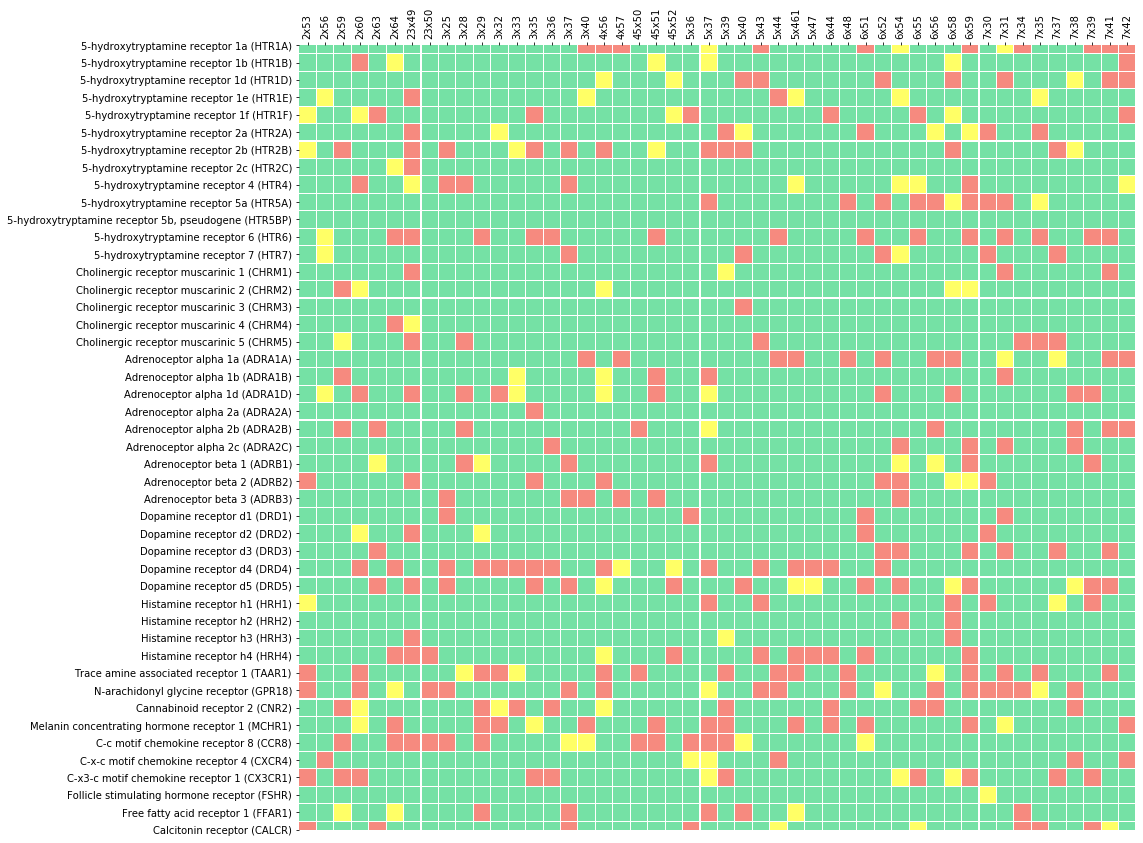

In [39]:
!{sys.executable} -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax2=sns.heatmap(gpcr_bspos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax)
ax2.xaxis.set_ticks_position('top')
plt.xticks(rotation=90) 
plt.show()
#plt.savefig("/home/martalo/Documentos/TFM/Pharmacogenomics/binding_site/bs_affected2.png")

In the previous heatmap we can see if a GPCR from the Houser list (46 rows), present the variant (position in the colum) in its BS and if it changes the amino acid type (red) or not (yellow).

#### Plot with extra info:

Set variables depending on preference:

In [40]:
showvars_val=1 # set to 0 will show all variants
order_by_varnum=False # set to False will order GPCRs alphabetically

The previous parameters can take the following values:

Show barplot of all variants ('showvars_val=0') or only display non-conservative variants ('showvars_val=1').

Change 'order_by_varnum=True', to order GPCRs by number of variants of type (non-conservative or all). Otherwise (set to 'False'), order alphabetically.

In [41]:
gpcr_bspos_count=dict(zip(all_gpcrs_axes,[0]*len(all_gpcrs_axes)))
for gpcridx in gpcr_bspos_count.keys():
    count=len([varval for varval in gpcr_bspos.loc[gpcridx].values if varval >showvars_val])
    gpcr_bspos_count[gpcridx]=count
    
gpcr_bspos_count_df=pd.DataFrame(list(gpcr_bspos_count.items()),
                      columns=['GPCR','Count'])


In [42]:
def change_width_h(ax, new_value) :
    ''' Changes the height of the bars of 'ax' to 'new_value' '''
    for patch in ax.patches :
        current_width = patch.get_height()
        diff = current_width - new_value
        # we change the bar height
        patch.set_height(new_value)
        
        # we recenter the bar
        patch.set_y(patch.get_y() + diff * .5)

def change_width_v(ax, new_value) :
    '''Changes the width of the bars of 'ax' to 'new_value' '''
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


In [43]:
def sorted_var_info(gpcr_bspos,gpcr_bspos_count_df):
    gpcr_bspos_count_df_sorted=gpcr_bspos_count_df.sort_values(by="Count",ascending=False)
    gpcrs_sorted=list(gpcr_bspos_count_df_sorted["GPCR"])
    
    gpcr_bspos_sorted=pd.DataFrame(columns=binding_site_gnum,index=gpcrs_sorted).fillna(value=0)
    for gpcr in gpcr_bspos_sorted.index:
        gpcr_bspos_sorted.loc[gpcr]= gpcr_bspos.loc[gpcr]

    return(gpcr_bspos_sorted,gpcr_bspos_count_df_sorted,gpcrs_sorted)

In [44]:
if order_by_varnum:
    (gpcr_bspos,gpcr_bspos_count_df,all_gpcrs_axes)=sorted_var_info(gpcr_bspos,gpcr_bspos_count_df)

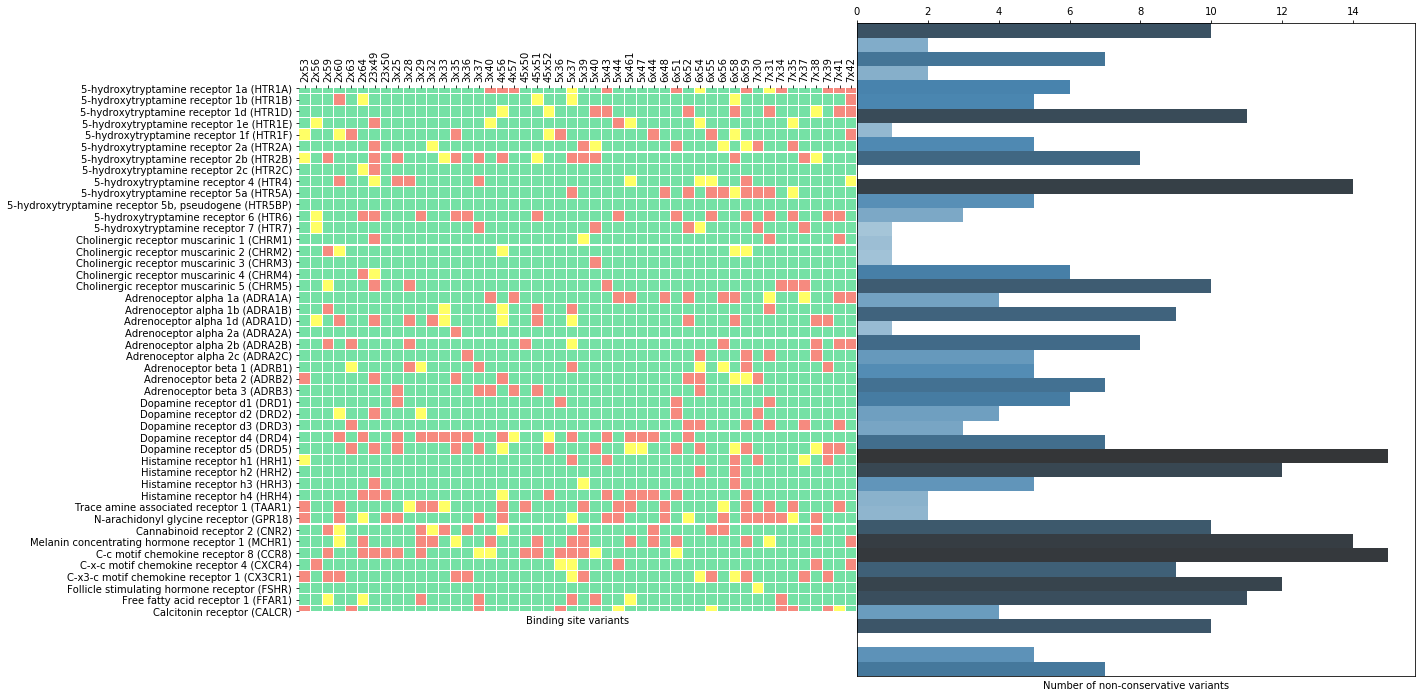

In [45]:
# represent the data frame gpcr_bspos as barplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
axA=sns.heatmap(gpcr_bspos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax[0])
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_bspos.columns , rotation=90)
axA.xaxis.set_label_text("Binding site variants")
#axA.xaxis.set_label_position('top') 

#gpcr_bspos_count_df 
pal = sns.color_palette("Blues_d", len(gpcr_bspos_count_df))
rank = gpcr_bspos_count_df["Count"].argsort().argsort() 
axB = sns.barplot(data=gpcr_bspos_count_df , x="Count",y="GPCR",palette=np.array(pal[::-1])[rank])
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of non-conservative variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [46]:
#gpcr_bspos_count_df.to_csv("/home/martalo/Documentos/TFM/Pharmacogenomics/mapping/data_intervals/gpcrs_affected_bs_count.csv")

The barplot is added to make the sum of variants of each GPCR (I think the colors are not important here).

#### Distribution of variant abundance in our dataset 

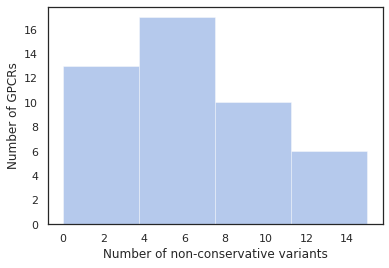

In [47]:
df=pd.DataFrame.from_dict(gpcr_bspos_count,orient="index").T
# data = gpcr_bspos_count -> dictionary with keys as the name of the GPCR
# and value as the number of variants it has (it depends in the selction of showvars_val as 0 or 1,
# that considers all the variants or only the ones that changes the aa type)
# parameter orient="index" means that the keys of the dictionary of 'data' should be rows (by default they are cols)
# .T = Transpose index and columns, we will do an histogram, trasposing the barplot

# Plot histogram df (data frame with name of the GPCR and number of variants )
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
ax=sns.distplot(df,  kde=False)
ax.xaxis.set_label_text("Number of non-conservative variants")# this axis name will depend on the showvars_val as 0 or 1 value
ax.yaxis.set_label_text("Number of GPCRs")

plt.show()

In this plot we cannot see the differences between the varinats that are conservatives (not changing the aa type) and non-conservative (changing aa type). We just can display the two distributions by changing the value of 'showvars_val' as 0 or 1. In the next section we make the separation.

### Same representations differencing conservative / non-conservative

In [48]:
#if order_by_varnum:
#    (gpcr_bspos,gpcr_bspos_count_df)=sorted_var_info(gpcr_bspos,gpcr_bspos_count_df)

In [49]:
def get_count_data(myval):
    gpcr_bspos_count_sel=dict(zip(all_gpcrs_axes,[0]*len(all_gpcrs_axes)))
    for gpcridx in gpcr_bspos_count_sel.keys():
        count=len([varval for varval in gpcr_bspos.loc[gpcridx].values if varval >=myval])
        gpcr_bspos_count_sel[gpcridx]=count
    gpcr_bspos_count_sel_df=pd.DataFrame(list(gpcr_bspos_count_sel.items()),
                          columns=['GPCR','Count'])

    df_sel=pd.DataFrame.from_dict(gpcr_bspos_count_sel,orient="index").T
    return (gpcr_bspos_count_sel_df,df_sel)

def get_count_dist(gpcr_bspos_count_sel_df,df_sel):
    gpcr_bspos_count_sel=df_sel.to_dict(orient="records")[0]
    abundance_dist_sel={}
    for gpcr,abundance in gpcr_bspos_count_sel.items():
        if abundance in abundance_dist_sel:
            abundance_dist_sel[abundance]+=1
        else:
            abundance_dist_sel[abundance]=1

    minkey=min(abundance_dist_sel.keys())
    maxkey=max(abundance_dist_sel.keys())
    for mykey in range(minkey,maxkey):
        if mykey not in abundance_dist_sel:
            abundance_dist_sel[mykey]=0
        
            
            
    abundance_dist_sel_df=pd.DataFrame(sorted(list(abundance_dist_sel.items()),key=lambda x: x[0]),
                          columns=['Count','GPCR num'])

    return abundance_dist_sel_df

(gpcr_bspos_count_cons_df,df_cons)=get_count_data(2)
(gpcr_bspos_count_all_df,df_all)=get_count_data(1)

abundance_dist_cons_df=get_count_dist(gpcr_bspos_count_cons_df,df_cons)
abundance_dist_all_df=get_count_dist(gpcr_bspos_count_all_df,df_all)

In [50]:
#gpcr_bspos_count_cons_df.to_csv("/home/martalo/Documentos/TFM/Pharmacogenomics/mapping/data_intervals/gpcrs_affected_bs_count_cons.csv")


#### Distribution of variant abundance in our dataset GPCRs

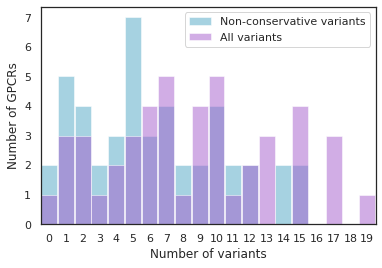

In [51]:
fig, ax = plt.subplots()

sns.barplot(data=abundance_dist_cons_df , x="Count",y="GPCR num",ax=ax,color="#3ab1d8" , alpha=0.5 , label="Non-conservative variants")#blue
sns.barplot(data=abundance_dist_all_df , x="Count",y="GPCR num",ax=ax, color="#a94ae0" , alpha=0.5,label="All variants")#purple

ax.xaxis.set_label_text("Number of variants")
ax.yaxis.set_label_text("Number of GPCRs")


change_width_v(ax, .95)

plt.legend()
plt.show()

In this plot we can see, for example, that there are a total of three GPCRs that present seven variants (in total, conservative or non-conservative) and only two GPCRs that present only seven non-conservative variants.

In [52]:
order_by_varnum=True
if order_by_varnum:
    (gpcr_bspos,gpcr_bspos_count_df,all_gpcrs_axes)=sorted_var_info(gpcr_bspos,gpcr_bspos_count_df)

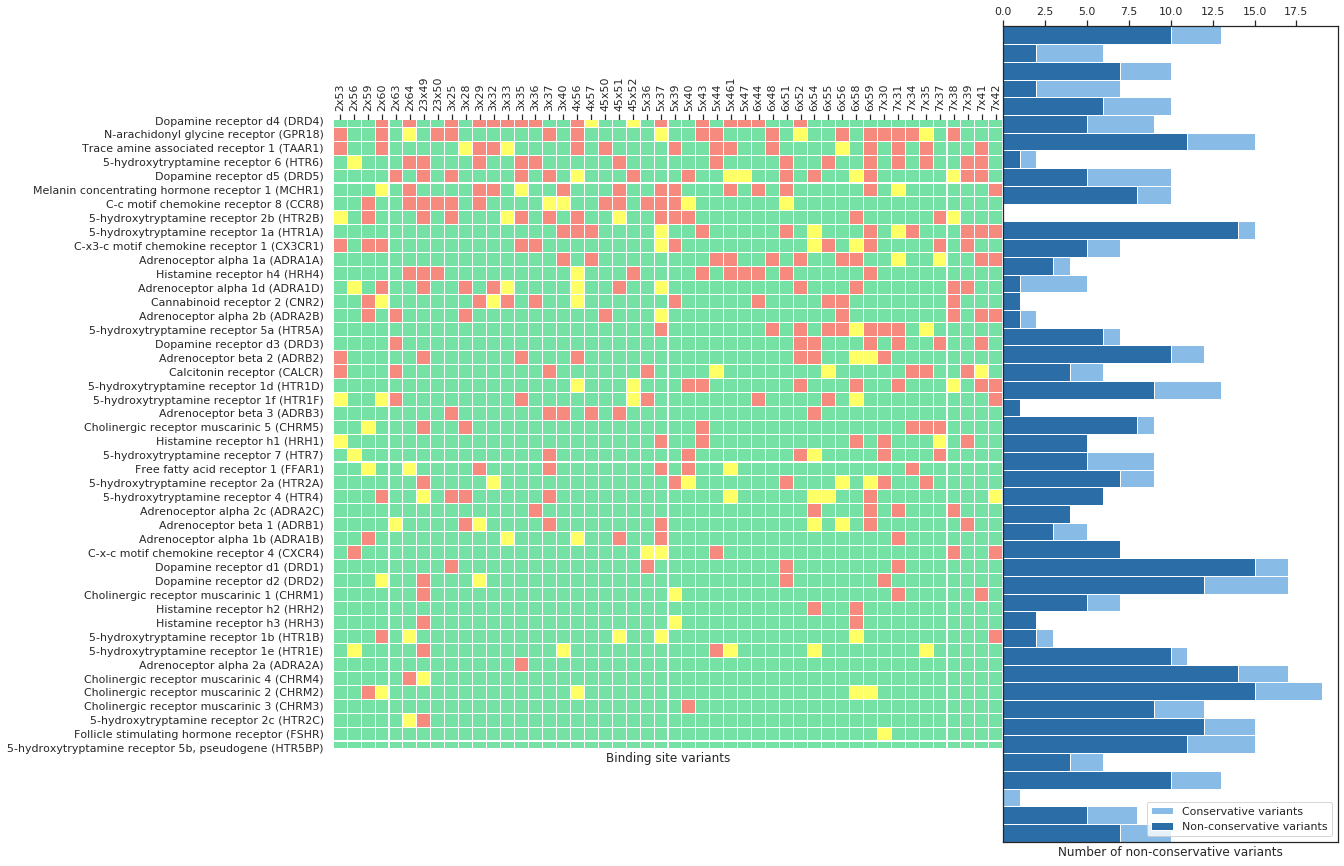

In [53]:
#gs = gridspec.GridSpec(1, 2) 

grid = plt.GridSpec(2, 2, wspace=0, hspace=0, width_ratios=[2, 1])
plt.figure(figsize=(18,30))

ax=plt.subplot(grid[0, 0])
#f, axs = plt.subplots(grid[0, 0],figsize=(15,15))
axA=sns.heatmap(gpcr_bspos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax)
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_bspos.columns , rotation=90)
axA.xaxis.set_label_text("Binding site variants")

ax2=plt.subplot(grid[0, 1])
axB = sns.barplot(data=gpcr_bspos_count_all_df , x="Count",y="GPCR",color="#79bcf7",label="Conservative variants")
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of non-conservative variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

ax3=plt.subplot(grid[0, 1])
axB = sns.barplot(data=gpcr_bspos_count_cons_df , x="Count",y="GPCR",color="#166fbc",label="Non-conservative variants")
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of non-conservative variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

plt.legend()
plt.show()

I think that the barplot is not ordered as the heatmap, it continues with the previous order (once it is order the first time, I think you should rerun the code to return to the original alphabetical order).

### Clustering

In [54]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):#[New]
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method)
    res_order = seriation(res_linkage, N, N + N-2)
    #seriated_dist = np.zeros((N,N))
    #a,b = np.triu_indices(N,k=1)
    #seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    #seriated_dist[b,a] = seriated_dist[a,b]
    
    return  res_order, res_linkage

def cluster_df(my_df):
    dist_mat_md = squareform(pdist(my_df))
    method="ward"
    res_order, res_linkage = compute_serial_matrix(dist_mat_md,method)

    df_order=[]
    for e in res_order:
        df_order.append(my_df.iloc[e].name)
    return gpcr_bspos.loc[df_order]

In [55]:
gpcr_bspos=cluster_df(gpcr_bspos)


In [56]:
def order_df_by_sorterlist(sorter,gpcr_bspos_count_df):
    sorterIndex = dict(zip(sorter,range(len(sorter))))

    gpcr_bspos_count_df['Rank'] = gpcr_bspos_count_df['GPCR'].map(sorterIndex)

    #gpcr_bspos_count_df.sort(['Player', 'Year', 'Tm_Rank'], ascending = [True, True, True], inplace = True)
    gpcr_bspos_count_df.sort_values(by="Rank",ascending=True,inplace = True)
    gpcr_bspos_count_df.drop('Rank', 1, inplace = True)
    return gpcr_bspos_count_df

sorter=gpcr_bspos.index
gpcr_bspos_count_df=order_df_by_sorterlist(sorter,gpcr_bspos_count_df)
gpcr_bspos_count_cons_df=order_df_by_sorterlist(sorter,gpcr_bspos_count_cons_df)
gpcr_bspos_count_all_df=order_df_by_sorterlist(sorter,gpcr_bspos_count_all_df)

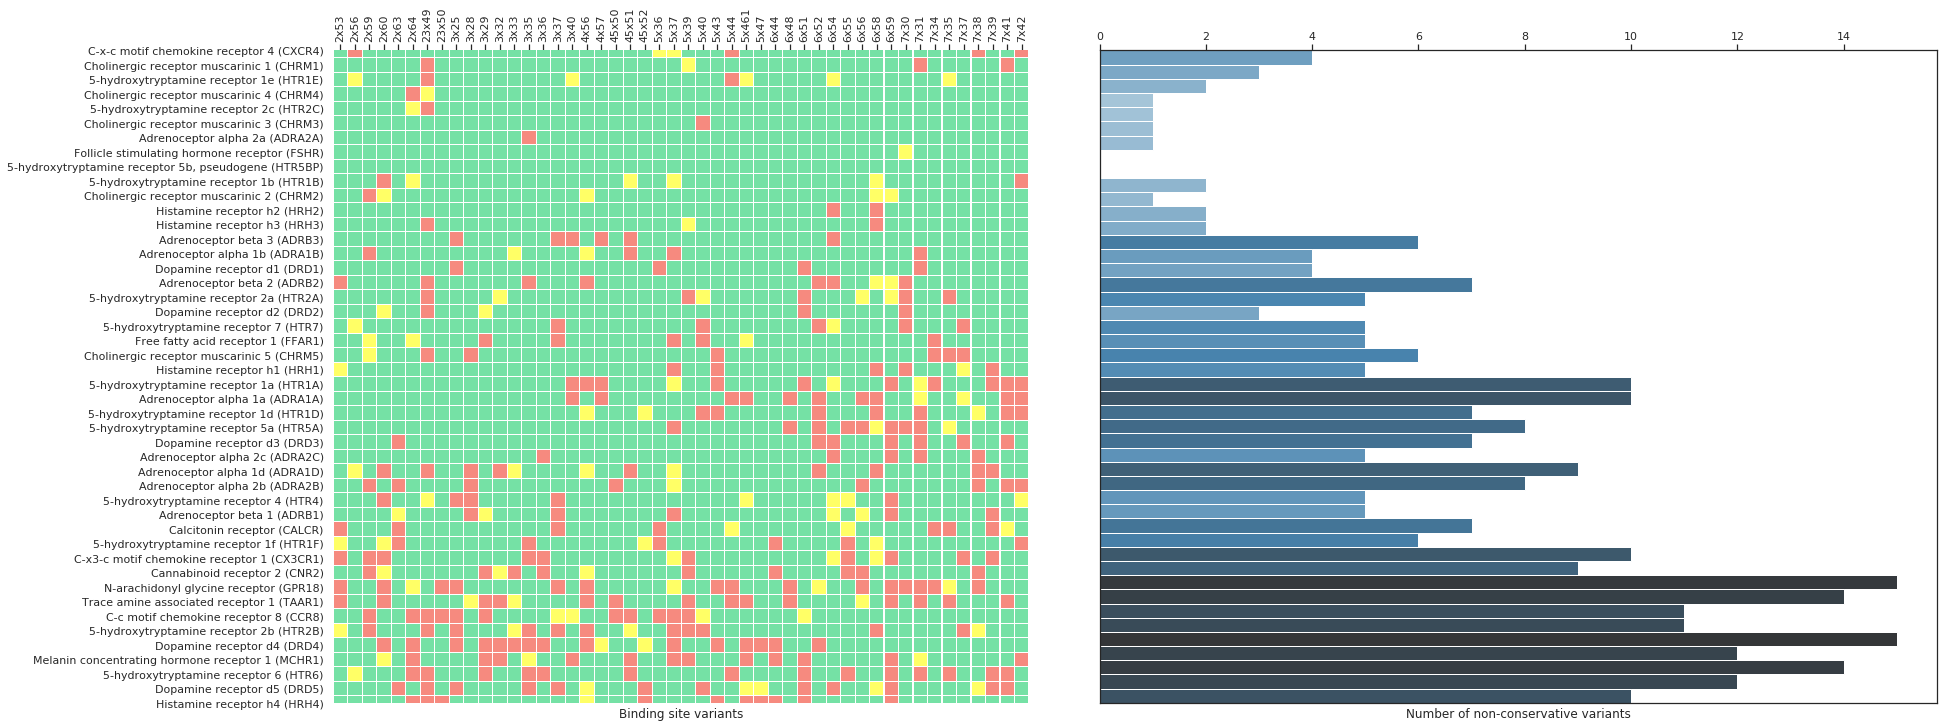

In [57]:
#gpcr_bspos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,12))
axA=sns.heatmap(gpcr_bspos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax[0])
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_bspos.columns , rotation=90)
axA.xaxis.set_label_text("Binding site variants")
#axA.xaxis.set_label_position('top') 

#gpcr_bspos_count_df 
pal = sns.color_palette("Blues_d", len(gpcr_bspos_count_df))
rank = gpcr_bspos_count_df["Count"].argsort().argsort() 
axB = sns.barplot(data=gpcr_bspos_count_df , x="Count",y="GPCR",palette=np.array(pal[::-1])[rank])
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of non-conservative variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [58]:
gpcr_bspos_count_all_df=order_df_by_sorterlist(sorter,gpcr_bspos_count_all_df)
gpcr_bspos_count_cons_df=order_df_by_sorterlist(sorter,gpcr_bspos_count_cons_df)

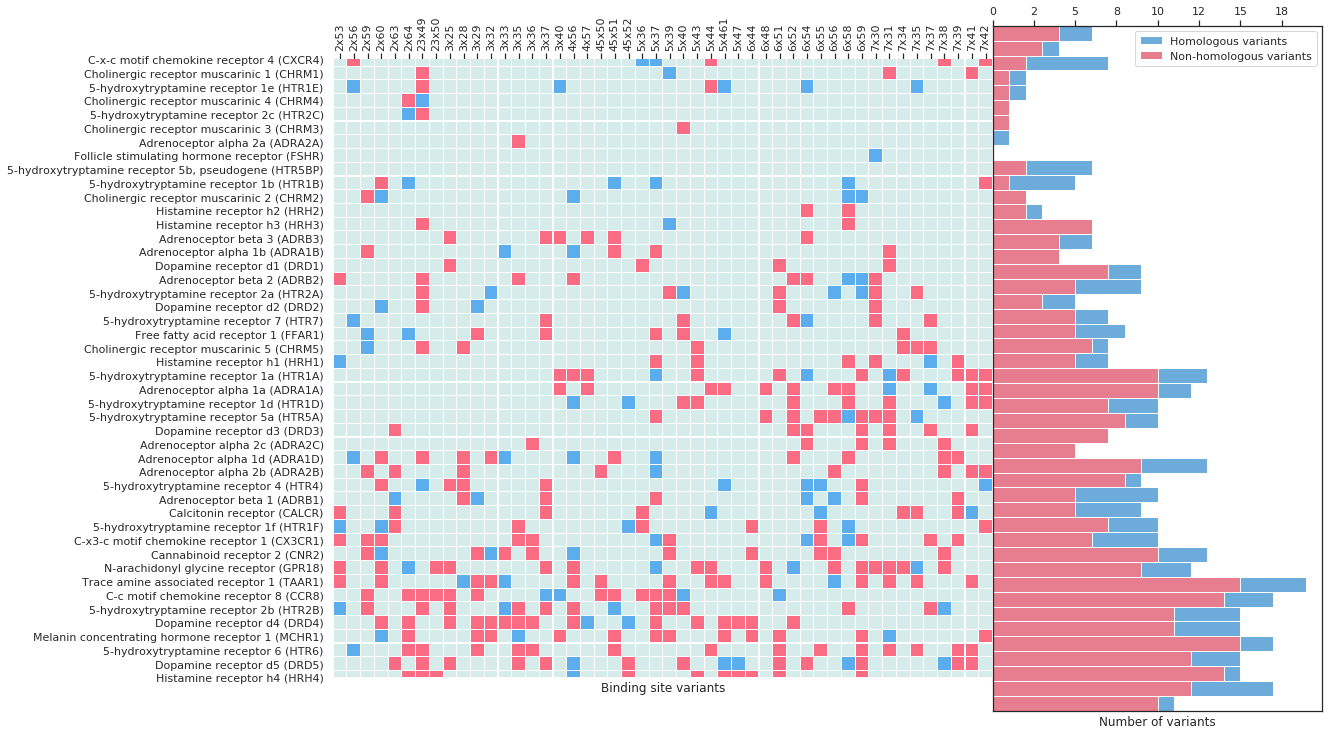

<Figure size 432x288 with 0 Axes>

In [59]:
cmap=["#75E1A5","#ffff66","#F68A7F"]
cmap=["#D5ECEB","#5BADED","#F96C84"]
grid = plt.GridSpec(2, 2, wspace=0, hspace=0, width_ratios=[2, 1])
plt.figure(figsize=(18,20))

ax=plt.subplot(grid[0, 0])
#f, axs = plt.subplots(grid[0, 0],figsize=(15,15))
axA=sns.heatmap(gpcr_bspos, cmap=cmap, linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax)
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_bspos.columns , rotation=90)
axA.xaxis.set_label_text("Binding site variants")
#axA.xaxis.set_label_position("top")

ax2=plt.subplot(grid[0, 1])
axB = sns.barplot(data=gpcr_bspos_count_all_df , x="Count",y="GPCR",color="#5BADED",label="Homologous variants")
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

ax3=plt.subplot(grid[0, 1])
axB = sns.barplot(data=gpcr_bspos_count_cons_df , x="Count",y="GPCR",color="#F96C84",label="Non-homologous variants")
axB.get_yaxis().set_visible(False)
axB.xaxis.set_major_formatter(FormatStrFormatter('%.f'))

axB.xaxis.set_label_text("Number of variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

plt.legend()
plt.tight_layout()

plt.show()
plt.savefig("/home/martalo/Documentos/TFM/GPCR_variants/Results/Binding_site/bs_affected_clustered.png")

Count of variants in the BS

In [60]:
gpcr_bspos_count_bybs_all=dict(zip(binding_site_gnum,[0]*len(binding_site_gnum)))
gpcr_bspos_count_bybs_noncons=dict(zip(binding_site_gnum,[0]*len(binding_site_gnum)))

for bspos in gpcr_bspos_count_bybs_all.keys():
    count_all=len([varval for varval in gpcr_bspos[bspos].values if varval> 0])
    count_noncons=len([varval for varval in gpcr_bspos[bspos].values if varval> 1])
    gpcr_bspos_count_bybs_all[bspos]=count_all
    gpcr_bspos_count_bybs_noncons[bspos]=count_noncons

gpcr_bspos_count_bybs_all_df=pd.DataFrame(list(gpcr_bspos_count_bybs_all.items()),
                      columns=['BS pos','Count'])
gpcr_bspos_count_bybs_noncons_df=pd.DataFrame(list(gpcr_bspos_count_bybs_noncons.items()),
                      columns=['BS pos','Count'])


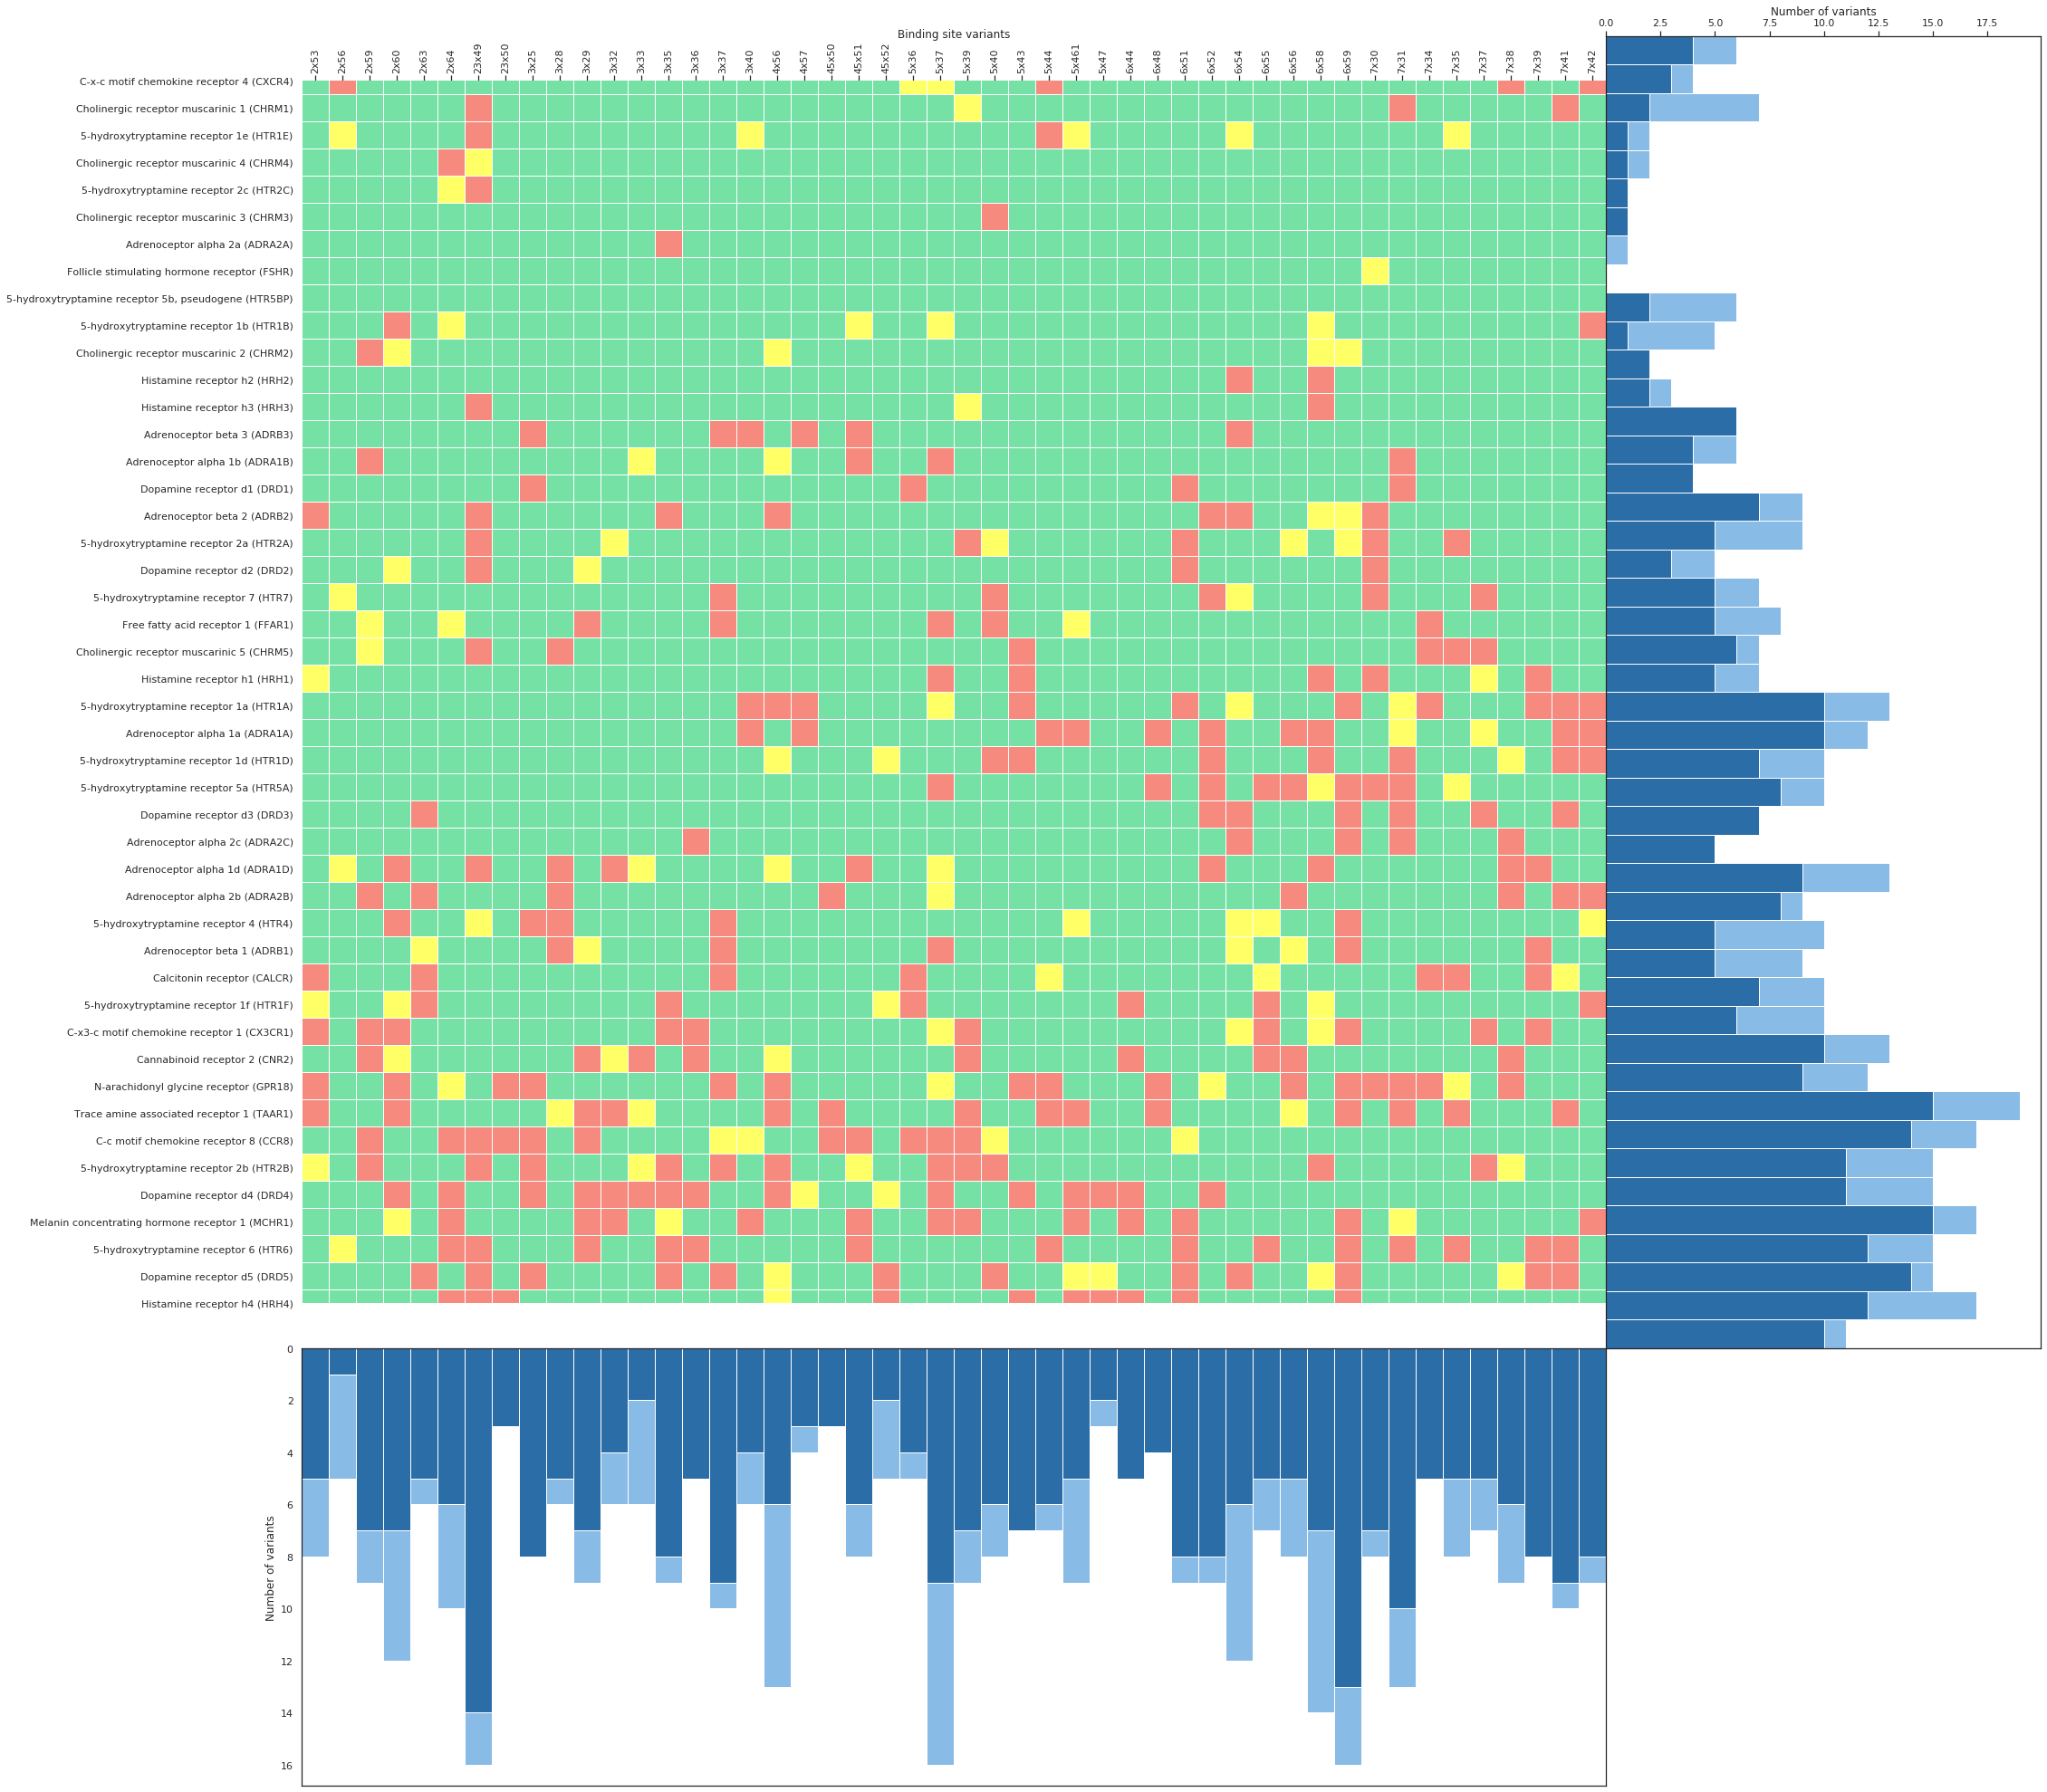

In [61]:

grid = plt.GridSpec(4,4, wspace=0, hspace=0)
#plt.figure(figsize=(59,75))
plt.figure(figsize=(31,28))
ax1=plt.subplot(grid[:-1, :-1])
axA=sns.heatmap(gpcr_bspos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax1)
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_bspos.columns , rotation=90)
axA.xaxis.set_label_text("Binding site variants")
axA.xaxis.set_label_position("top")

ax2=plt.subplot(grid[:-1, -1])
axB = sns.barplot(data=gpcr_bspos_count_all_df , x="Count",y="GPCR",color="#79bcf7",label="Conservative variants",ax=ax2)
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of variants")
axB.xaxis.set_ticks_position('top')
axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

ax2=plt.subplot(grid[:-1, -1])
axB = sns.barplot(data=gpcr_bspos_count_cons_df , x="Count",y="GPCR",color="#166fbc",label="Non-conservative variants",ax=ax2)
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of variants")
axB.xaxis.set_ticks_position('top')
axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

ax3=plt.subplot(grid[-1, :-1])
axB = sns.barplot(data=gpcr_bspos_count_bybs_all_df , y="Count",x="BS pos",color="#79bcf7",label="Conservative variants",ax=ax3)
axB.get_xaxis().set_visible(False)
axB.yaxis.set_label_text("Number of variants")
axB.invert_yaxis()
change_width_v(axB, 1)

ax3=plt.subplot(grid[-1, :-1])
axB = sns.barplot(data=gpcr_bspos_count_bybs_noncons_df , y="Count",x="BS pos",color="#166fbc",label="Non-conservative variants",ax=ax3)
axB.get_xaxis().set_visible(False)
axB.yaxis.set_label_text("Number of variants")
#axB.invert_yaxis()
change_width_v(axB, 1)
plt.tight_layout()

plt.show()

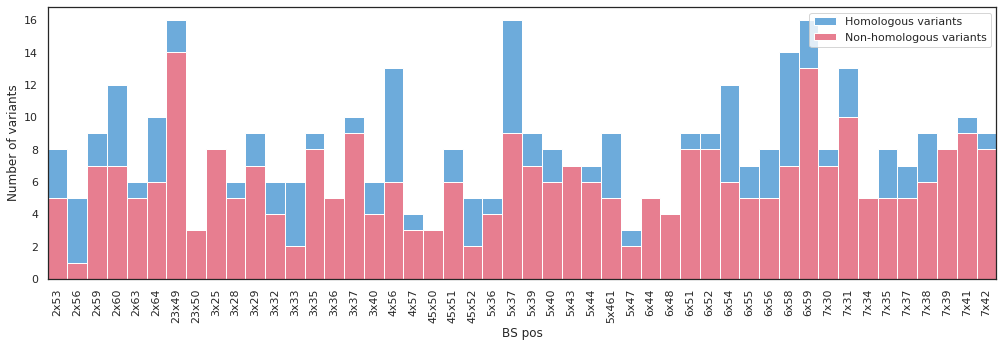

<Figure size 432x288 with 0 Axes>

In [62]:
#cmap=["#D5ECEB","#5BADED","#F96C84"]

fig, ax = plt.subplots(figsize=(17,5))
axB = sns.barplot(data=gpcr_bspos_count_bybs_all_df , y="Count",x="BS pos",color="#5BADED",label="Homologous variants",ax=ax)
axB.set_xticklabels(labels=gpcr_bspos.columns , rotation=90)
#axB.get_xaxis().set_visible(False)
axB.yaxis.set_label_text("Number of variants")
#axB.invert_yaxis()
change_width_v(axB, 1)

axB = sns.barplot(data=gpcr_bspos_count_bybs_noncons_df , y="Count",x="BS pos",color="#F96C84",label="Non-homologous variants",ax=ax)
#axB.get_xaxis().set_visible(False)
axB.yaxis.set_label_text("Number of variants")
change_width_v(axB, 1)
plt.legend()
plt.show()
plt.savefig("/home/martalo/Documentos/TFM/GPCR_variants/Results/Binding_site/bs_count_positions.png")

# Interesting positions to mutate and simulate of the Binding Site
We have seen than position 23x49 of the Binding Site is the one with more non-homologous variants so we will store the info of those variants in two files.
1. First we will store the 'short info', that is ex: {'affected_pred': False, 'affected_items_pred': [], 'pdb_pos': {'aa': 'V', 'pos': '31', 'chain': 'A'}, 'gpcr_num': '1x36', 'aa_type_changed': False} -> obtained with the function 'var_to_display'. We will store this info of all the non-homolous varians detected in position 23x49 of the 46 GPCRs (14).

In [101]:
resultspath_var="/home/martalo/Documentos/TFM/GPCR_variants/Results/studied_GPCR_vars/filtered_var_list"
pp=re.compile(".*\((\w*)\)")

# Print 'short' info of the non-homologous variant in a file
with open(os.path.join(resultspath_var,'myvar_list_bs_short.txt'), 'w') as outfile:
    for gpcrname in all_gpcrs_axes:# iteration over the 46 GPCRs
        gpcr=re.search(pp,gpcrname).group(1) # search and store the short names of the GPCRS        
        gpcr_vars_bs=var_to_display(ex_gpcr=gpcr,dictpath=dictpath) # function in 'create_csv',
        # returns list of variats for the GPCR 'gpcr_cm' (short info, organized) 
        if gpcr_vars_bs:# if there are variants in the GPCR
            potential_vars={}
            for var in gpcr_vars_bs:# iteration over the variants of the GPCR
                gnum_bs=var["gpcr_num"] # store the position of the variant
                var_type_bs=var["aa_type_changed"]
                if gnum_bs=='23x49'and var_type_bs:
                    outfile.write(json.dumps(var))
outfile.close()    

No pdb found for HTR5BP


2. Now, we will store the 'long info' of the same variants in another file. Ex: {'gpcrdb': '3.50x50', 'seqN': '134', 'var_aa': 'R', 'wt_aa': 'S', 'sift_poloP': True, 'DisGeNet_disease': False, 'gprotInt': True, 'arrestinInt': True, 'activation': False, 'microSwitch': True, 'sodiumP': False, 'ptm': False, 'interact': False}

In [102]:
#write the non-homologous variant 'long info' of positions 3x50 
with open(os.path.join(resultspath_var,'myvar_list_bs_long.txt'), 'w') as outfile:
    for gpcrname in all_gpcrs_axes:# iteration over the 46 GPCRs
        gpcr=re.search(pp,gpcrname).group(1) # search and store the short names of the GPCRS        
        outfile.write(json.dumps(var_to_display_in_file('23x49',gpcr))) # write dictionary in the file


DRD4
GPR18
HTR6
{'gpcrdb': '23.49x49', 'seqN': '91', 'var_aa': 'R', 'wt_aa': 'C', 'sift_poloP': True, 'DisGeNet_disease': False, 'gprotInt': False, 'arrestinInt': False, 'activation': False, 'microSwitch': False, 'sodiumP': False, 'ptm': False, 'interact': False}
TAAR1
DRD5
{'gpcrdb': '23.49x49', 'seqN': '106', 'var_aa': 'Y', 'wt_aa': 'H', 'sift_poloP': False, 'DisGeNet_disease': False, 'gprotInt': False, 'arrestinInt': False, 'activation': False, 'microSwitch': False, 'sodiumP': False, 'ptm': False, 'interact': False}
MCHR1
HTR2B
{'gpcrdb': '23.49x49', 'seqN': '120', 'var_aa': 'M', 'wt_aa': 'T', 'sift_poloP': False, 'DisGeNet_disease': False, 'gprotInt': False, 'arrestinInt': False, 'activation': False, 'microSwitch': False, 'sodiumP': False, 'ptm': False, 'interact': False}
CCR8
{'gpcrdb': '23.49x49', 'seqN': '98', 'var_aa': 'Q', 'wt_aa': 'P', 'sift_poloP': '?', 'DisGeNet_disease': '?', 'gprotInt': '?', 'arrestinInt': '?', 'activation': '?', 'microSwitch': '?', 'sodiumP': '?', 'ptm':

# Variants in conserved motifs
According to the classification of GPCRmd (https://submission.gpcrmd.org/view/40/), there are four types of conserved regions: 'Sodium binging site' (D2.50, S3.39, N7.45, S7.46), 'Ionic lock' (R3.50, E6.30), 'Rotamer toggle switch' (W6.48). In the paper Hauser et al. (doi: 10.1016/J.CELL.2017.11.033), they consider more residues as members of conserved motifs but, by now, we will just consider those three conserved motifs.


In [63]:
# store the residue positions of all three types of conserved motifs
naBS=['2x50', '3x39', '7x45', '7x46'] # Sodium binding site
ionicLock=['3x50', '6x30'] # Ionic lock
rotTogg=['6x48'] # Rotamer toggle switch
consMotifsPos= naBS + ionicLock + rotTogg # all positions in a list
consMotifs = [naBS, ionicLock, rotTogg] # all conserved motifs, list if lists

consMotif = {'naBS':['2x50', '3x39', '7x45', '7x46'], 'ionicLock':['3x50', '6x30'], 'rotTogg':['6x48']} # dictionary
print(consMotifsPos)
print(consMotifs)
print(consMotif)

['2x50', '3x39', '7x45', '7x46', '3x50', '6x30', '6x48']
[['2x50', '3x39', '7x45', '7x46'], ['3x50', '6x30'], ['6x48']]
{'naBS': ['2x50', '3x39', '7x45', '7x46'], 'ionicLock': ['3x50', '6x30'], 'rotTogg': ['6x48']}


## Are they in the binding site?
Check if the residues of the conserved motifs are in the binding site of the GPCRs:

In [64]:
notBS=0 # counts of positions that are not in the BS
for item in consMotifsPos: #iteration over all the positions that are part of conserved motifs
    if item not in binding_site_gnum: # check if they are not in the list of BS residues
        print(item, ' is not in the BS.')
        notBS+=1
    else:
        print(item, ' is in the BS.')
print('From a total of %d positions of the conserved motifs, %d are not in the binding site of any GPCR.' % (len(consMotifsPos), notBS))


2x50  is not in the BS.
3x39  is not in the BS.
7x45  is not in the BS.
7x46  is not in the BS.
3x50  is not in the BS.
6x30  is not in the BS.
6x48  is in the BS.
From a total of 7 positions of the conserved motifs, 6 are not in the binding site of any GPCR.


So, there is one position, 6x48 that is part of the Binding Site and also part of the conserved motif Rotamer Toggle Switch.

## Representation of the conserved motifs

In [65]:
gpcr="HTR1B"
#(var_info,all_gpcrs)=var_pos_in_pdb() # Stores all the info of the variants of the GPCRs
pdbname=var_info[gpcr]["pdb"] # collect the name of the pdb file of HTRB1
json_filename=pdbname+"_conv.json"
gpcr_pdb=gpcr_pdb_dict_fom_json(dictpath+json_filename) # dictionary of the structure of HTR1B

# visualize the HTR1B protein and the conserved motifs
pdb=var_info[gpcr]["pdb"]
gpcr_sel="protein and chain A"

mypdb=pdb+".pdb"
mypdbpath=os.path.join(pdb_path,mypdb)
mol = Molecule(mypdbpath)
mol.reps.add(sel=gpcr_sel,color="#f4f8ff",style='NewCartoon')
# build the color map for the different motifs
motifColor={}
color_map_mot= ['#4f91b4', '#a64fb4', '#4fb474'] # Blue:NaBS, Purple:Ionic lock, Green:Rotamer Toggle
colr=0
for motif in consMotif:
    motifColor[motif]=color_map_mot[colr]
    colr+=1

for motif in consMotif:
    for gnum_pos in consMotif[motif]:
        if gnum_pos in gpcr_pdb:# select the residues that corresponds to one conserved motif
            gpcr_pdb[gnum_pos]
            mysel="(resid "+gpcr_pdb[gnum_pos]["pos"]+" and chain "+gpcr_pdb[gnum_pos]["chain"]+")"
            mol.reps.add(sel=mysel ,color=motifColor[motif],style='VDW')

mol.view()

NGLWidget()

In blue we see the positions that correspond to the conserved motif 'Sodium binding site', in purple the 'Ionic lock', and, finally, in green the 'Rotamer toggle switch', to represent those positions we have used the 'HTR1B' as a template. As said before, there is one residue position, 6.48, that is part of the binding site of  some GPCRs, that residue corresponds to the 'Rotamer toggle switch', represented in green.

## Affected conserved motifs
Study which of those positions have known variants.

In [66]:

(var_info,all_gpcrs)=var_pos_in_pdb() # from Code/create_csv.py
# Reads the file myprot_list_strucNvar.csv that contains the info of the variants detected in the GPCRs
print(len(all_gpcrs))
cm_affected={} # conserved motifs affected
for gpcr in all_gpcrs:#iterate over the GPCRs
    cm_var=False
    gpcr_vars_cm=var_to_display(ex_gpcr=gpcr,dictpath=dictpath) # list of variants in the GPCR
    #Build a list of variants of the introduced GPCR in ex_gpcr, it also stores if the variant changes the aa type or not
    if gpcr_vars_cm:
        for var in gpcr_vars_cm:
            if var["gpcr_num"] in consMotifsPos:#check if the variants are in the list of residues of the conserved motifs 
                cm_var=True
        if cm_var:
            cm_affected[gpcr]=gpcr_vars_cm
print("%i of %i studied gpcrs have affected one conserved motif."%(len(cm_affected),len(all_gpcrs)))

46
No pdb found for HTR5BP
32 of 46 studied gpcrs have affected one conserved motif.


The dictionary 'cm_affected' stores the GPCRs that have variants affecting some conserved motif. The keys are the GPCR name and the values contain all the information of the detected variants.

### Representation of the affected conserved motifs of one GPCR

In [67]:
#from Variants_general/gpcr_vars_reps import create_reps_affected
gpcr="HTR1B"
print(gpcr)
create_reps_affected(gpcr,var_info,restrict_vars=consMotifsPos,path_to_project=path_to_project).view()

HTR1B


NGLWidget()

Using the 'HTR1B' as an example, we can see which of the residues conforming the three conserved motifs present variants. In this case, there are two positions that can show a variant, the greenish one is part of the 'Ionic lock' motif (represented in purple in the previous representation) and the red one is part of the 'Sodium binding site' (blue in the previous representation).
The colors of the variants in this case stand for: 'interact': dark blue 'ptm': orange 'arrestinInt+gprotInt': green 'sodiumP': red 'microSwitch': purple 'DisGeNet_disease': brown 'activation': pink 'sift_poloP': yellow-ish green

## Average conserved motifs variants affected
Now we will compute how many of the considered GPCRs present variants in the conserved motifs.

In [68]:
# using the list of conserved motifs residues of all the GPCRs 'consMotifsPos'
# build the following dictionary: keys as the elements of the list
cons_motif_dict={el:0 for el in consMotifsPos} # set to zero all the values 

# iterate over the dictionary 'pdbname : info of the variants affecting its conserved motif'
for gpcr,gpcr_vars in cm_affected.items():
    for var in gpcr_vars: # iterate over each variant affecting the CM of a GPCR
        for cm_pos in consMotifsPos: # iterate over the list of all CM residues 
            if var["gpcr_num"] == cm_pos:
                cons_motif_dict[cm_pos]+=1 # +1 if the variant is detected in the same position for another GPCR
                
# the following dictionary contains the positions of all CM and the % of GPCRs that have a variant there                
cons_motif_dict={pos:round((freq/len(all_gpcrs))*100) for pos,freq in cons_motif_dict.items()} 
print(cons_motif_dict)
print(len(cons_motif_dict))

{'2x50': 22, '3x39': 22, '7x45': 11, '7x46': 24, '3x50': 41, '6x30': 20, '6x48': 9}
7


The previous dictionary shows the % of GPCRs that may present a variation in each residue conforming the conserved motifs. Next, we will represent in a GPCR all the variants affecting the three conserved motifs following the color map of 'redish' as less frequent and 'greenish' as more frequent.

In [69]:
gpcr="HTR1B" # using this GPCR as an example
pdbname=var_info[gpcr]["pdb"]
json_filename=pdbname+"_conv.json"
gpcr_pdb=gpcr_pdb_dict_fom_json(dictpath+json_filename)

vars_display_cm=[]# list containing dictionaries with the position, chain and freq of variants in the CMs
for gnum, freq in cons_motif_dict.items():
    cm_var_info={}
    if gnum in gpcr_pdb:
        cm_var_info["pdb_pos"]=gpcr_pdb[gnum]["pos"]
        cm_var_info["chain"]=gpcr_pdb[gnum]["chain"]
        cm_var_info["value"]=freq
        vars_display_cm.append(cm_var_info)
        
#color_map=['#f00', '#ff0e00', '#ff1b00', '#ff2900', '#ff3600', '#f40', '#ff5100', '#ff5f00', '#ff6d00', '#ff7a00', '#f80', '#ff9500', '#ffa300', '#ffb100', '#ffbe00', '#fc0', '#ffd900', '#ffe700', '#fff400', '#fcff00', '#ef0', '#e1ff00', '#d3ff00', '#c6ff00', '#b8ff00', '#af0', '#9dff00', '#8fff00', '#82ff00', '#74ff00', '#6f0', '#59ff00', '#4bff00', '#3eff00', '#30ff00', '#23ff00', '#15ff00']
color_map=create_color_scale("/home/martalo/Documentos/TFM/GPCR_variants/Data/colors.txt")
# redish, variants not found in GPCRs, greenish present in more an more GPCRs
create_reps_colormap(gpcr,var_info,vars_display_cm,color_map).view()

NGLWidget()

In [70]:
for k,v in cons_motif_dict.items():
    print(k,"\t",v)
print('Total variantions in conserved motifs: ',len( cons_motif_dict))
# The fist colum is the gnum and the second is the % of GPCRs with a variation in that position

2x50 	 22
3x39 	 22
7x45 	 11
7x46 	 24
3x50 	 41
6x30 	 20
6x48 	 9
Total variantions in conserved motifs:  7


In [71]:
all_gpcrs_axes_cm=[]
for mygpcr,mygpcr_info in var_info.items():
    all_gpcrs_axes_cm.append("%s (%s)" % (mygpcr_info["name"].capitalize(),mygpcr))
# build new data frame to display the heatmaps for the affected conserved motifs
gpcr_cmpos=pd.DataFrame(columns=consMotifsPos,index=all_gpcrs_axes_cm).fillna(value=0) # build pandas data frame
# cols are the residues of the conserved motifs of all GPCRs, the rows are the names of the GPCRs with CM affected
# initially all the values of the matric set to zero
print(all_gpcrs_axes_cm,'\n') 
print('Total number of GPCRs: ',len(all_gpcrs_axes_cm))

['5-hydroxytryptamine receptor 1a (HTR1A)', '5-hydroxytryptamine receptor 1b (HTR1B)', '5-hydroxytryptamine receptor 1d (HTR1D)', '5-hydroxytryptamine receptor 1e (HTR1E)', '5-hydroxytryptamine receptor 1f (HTR1F)', '5-hydroxytryptamine receptor 2a (HTR2A)', '5-hydroxytryptamine receptor 2b (HTR2B)', '5-hydroxytryptamine receptor 2c (HTR2C)', '5-hydroxytryptamine receptor 4 (HTR4)', '5-hydroxytryptamine receptor 5a (HTR5A)', '5-hydroxytryptamine receptor 5b, pseudogene (HTR5BP)', '5-hydroxytryptamine receptor 6 (HTR6)', '5-hydroxytryptamine receptor 7 (HTR7)', 'Cholinergic receptor muscarinic 1 (CHRM1)', 'Cholinergic receptor muscarinic 2 (CHRM2)', 'Cholinergic receptor muscarinic 3 (CHRM3)', 'Cholinergic receptor muscarinic 4 (CHRM4)', 'Cholinergic receptor muscarinic 5 (CHRM5)', 'Adrenoceptor alpha 1a (ADRA1A)', 'Adrenoceptor alpha 1b (ADRA1B)', 'Adrenoceptor alpha 1d (ADRA1D)', 'Adrenoceptor alpha 2a (ADRA2A)', 'Adrenoceptor alpha 2b (ADRA2B)', 'Adrenoceptor alpha 2c (ADRA2C)', 'Adr

So, we also have 46 GPCRs to work with. Next, we separate the variants in two groups, the ones that change the amino acid type and the ones that 'mantain' the amino acid type. *** As in the part of BS affected, the total number of GPCRs of our data set is 46, but 40 have the BS affected. In this case, only 31 have at least one conserved motif affected. However, the GPCRs with no variations are considered in the heatmap -> there is not filtering, maybe we should filter them?

In [72]:
#Vars of the CM found in each GPCR
pp=re.compile(".*\((\w*)\)")

for gpcrname in all_gpcrs_axes_cm:# iteration over the GPCRs
    gpcr_cm=re.search(pp,gpcrname).group(1)
    gpcr_vars_cm=var_to_display(ex_gpcr=gpcr_cm,dictpath=dictpath) # function in 'create_csv', returns list of variats of the GPCR with information about the aa change type as well  
    if gpcr_vars_cm:
        found_pos_cm={}
        for var in gpcr_vars_cm:# iteration over the variants of the BS of each GPCR
            gnum_cm=var["gpcr_num"]
            if gnum_cm:
                found_pos_cm[gnum_cm]=var["aa_type_changed"]
        for cmpos in consMotifsPos: # filling the data frame with '1' or '2'
            if cmpos in found_pos_cm:
                aa_type_changed_cm=found_pos_cm[cmpos]
                if aa_type_changed_cm:
                    gpcr_cmpos[cmpos][gpcrname]=2 # set to '2' if the aa changes
                else:
                    gpcr_cmpos[cmpos][gpcrname]=1 # set to '1' if the new aa type is similar

No pdb found for HTR5BP


In [73]:
gpcr_cmpos # data frame filled, cols are the residues of the CM and the rows the GPCRs with CM affected

,2x50,3x39,7x45,7x46,3x50,6x30,6x48
5-hydroxytryptamine receptor 1a (HTR1A),0,0,0,0,2,0,0
5-hydroxytryptamine receptor 1b (HTR1B),0,0,0,2,0,0,0
5-hydroxytryptamine receptor 1d (HTR1D),2,2,0,0,2,2,0
5-hydroxytryptamine receptor 1e (HTR1E),0,2,0,0,0,0,0
5-hydroxytryptamine receptor 1f (HTR1F),0,0,0,2,2,0,0
5-hydroxytryptamine receptor 2a (HTR2A),0,0,0,0,2,0,0
5-hydroxytryptamine receptor 2b (HTR2B),0,2,2,0,1,2,0
5-hydroxytryptamine receptor 2c (HTR2C),0,0,0,0,0,0,0
5-hydroxytryptamine receptor 4 (HTR4),0,2,0,0,0,0,0
5-hydroxytryptamine receptor 5a (HTR5A),0,0,0,1,2,1,2


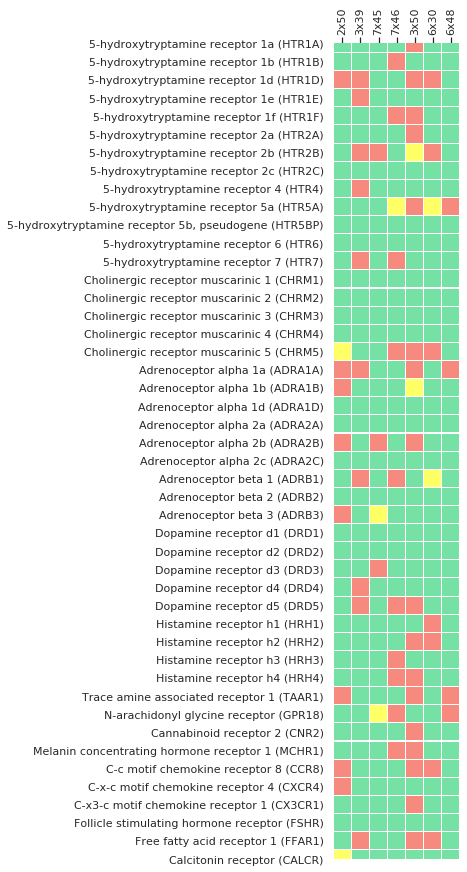

In [74]:
figcm, axcm = plt.subplots(figsize=(15,15))
ax2cm=sns.heatmap(gpcr_cmpos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=axcm)
ax2cm.xaxis.set_ticks_position('top')
plt.xticks(rotation=90) 
plt.show()

The previous heatmap coincides with the % computed before, for example a 20% of the 46 GPCRs presented variants at position 6.30, that is 9 'non-green cells'.

#### Plot with extra info
Next, we want to compute the barplots, make the differenciation of conservative and non-conservative variants and do the clustering.

In [75]:
showvars_val_cm=1 # set to 0 will show all variants
order_by_varnum_cm=False # set to False will order GPCRs alphabetically

In [76]:
def sorted_var_info_cm(gpcr_cmpos,gpcr_cmpos_count_df):
    gpcr_cmpos_count_df_sorted=gpcr_cmpos_count_df.sort_values(by="Count",ascending=False)
    gpcrs_sorted=list(gpcr_cmpos_count_df_sorted["GPCR"])
    
    gpcr_cmpos_sorted=pd.DataFrame(columns=consMotifsPos,index=gpcrs_sorted).fillna(value=0)
    for gpcr in gpcr_cmpos_sorted.index:
        gpcr_cmpos_sorted.loc[gpcr]= gpcr_cmpos.loc[gpcr]

    return(gpcr_cmpos_sorted,gpcr_cmpos_count_df_sorted,gpcrs_sorted)

In [77]:
gpcr_cmpos_count=dict(zip(all_gpcrs_axes_cm,[0]*len(all_gpcrs_axes_cm)))
for gpcridx in gpcr_cmpos_count.keys():
    count_cm=len([varval for varval in gpcr_cmpos.loc[gpcridx].values if varval >showvars_val_cm])
    gpcr_cmpos_count[gpcridx]=count_cm
    
gpcr_cmpos_count_df=pd.DataFrame(list(gpcr_cmpos_count.items()),
                      columns=['GPCR','Count'])

if order_by_varnum_cm:
    (gpcr_cmpos,gpcr_cmpos_count_df,all_gpcrs_axes_cm)=sorted_var_info_cm(gpcr_cmpos,gpcr_cmpos_count_df)

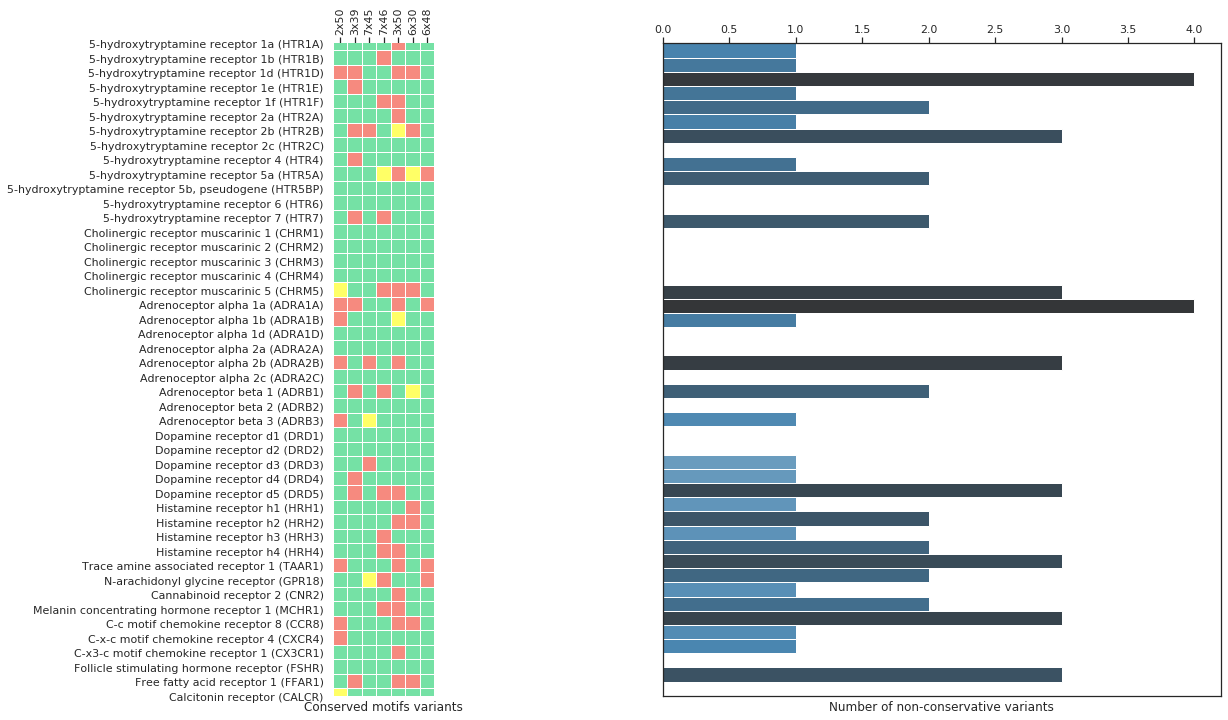

In [78]:
# represent the data frame gpcr_cmpos as barplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
axAcm=sns.heatmap(gpcr_cmpos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax[0])
axAcm.xaxis.set_ticks_position('top')
axAcm.set_xticklabels(labels=gpcr_cmpos.columns , rotation=90)
axAcm.xaxis.set_label_text("Conserved motifs variants")
#axA.xaxis.set_label_position('top') 

#gpcr_cmpos_count_df 
palcm = sns.color_palette("Blues_d", len(gpcr_cmpos_count_df))
rankcm = gpcr_cmpos_count_df["Count"].argsort().argsort() 
axBcm = sns.barplot(data=gpcr_cmpos_count_df , x="Count",y="GPCR",palette=np.array(palcm[::-1])[rankcm])
axBcm.get_yaxis().set_visible(False)
axBcm.xaxis.set_label_text("Number of non-conservative variants")
axBcm.xaxis.set_ticks_position('top')
#axBcm.xaxis.set_label_position('top') 
change_width_h(axBcm, 1)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

*** In this barplot, if we change the variable 'showvars_val_cm' to 0 to display all variants, the x axis leyend should change to 'Number of total variants', the rest works without problems.

#### Distribution of variant abundance in the conserved motifs in our dataset 

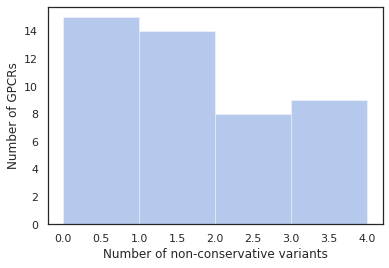

In [79]:
dfcm=pd.DataFrame.from_dict(gpcr_cmpos_count,orient="index").T
# data = gpcr_cmpos_count -> dictionary with keys as the name of the GPCR with CM affected
# and value as the number of variants it has (it depends in the selction of showvars_val as 0 or 1,
# that considers all the variants or only the ones that changes the aa type)
# parameter orient="index" means that the keys of the dictionary of 'data' should be rows (by default they are cols)
# .T = Transpose index and columns, we will do an histogram, trasposing the barplot

# Plot histogram df (data frame with name of the GPCR and number of variants )
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
axcm=sns.distplot(dfcm,  kde=False)
axcm.xaxis.set_label_text("Number of non-conservative variants")# this axis name will depend on the showvars_val as 0 or 1 value
axcm.yaxis.set_label_text("Number of GPCRs")

plt.show()

In this plot we cannot see the differences between the varinats that are conservatives (not changing the aa type) and non-conservative (changing aa type). We just can display the two distributions by changing the value of 'showvars_val_cm' as 0 or 1. In the next section we make the separation.

### Same representations differencing conservative / non-conservative variants in the conserved motifs

In [80]:
#the following function comes from 'get_count_data()' but now we adap it to work with cm, although we could adapt the
# get_count_data() itself, but in order to keep the previous work untouched I will copy the function
def get_count_data_cm(myval):
    gpcr_cmpos_count_sel=dict(zip(all_gpcrs_axes,[0]*len(all_gpcrs_axes)))
    for gpcridx in gpcr_cmpos_count_sel.keys():
        count=len([varval for varval in gpcr_cmpos.loc[gpcridx].values if varval >=myval])
        gpcr_cmpos_count_sel[gpcridx]=count
    gpcr_cmpos_count_sel_df=pd.DataFrame(list(gpcr_cmpos_count_sel.items()),
                          columns=['GPCR','Count'])

    df_sel=pd.DataFrame.from_dict(gpcr_cmpos_count_sel,orient="index").T
    return (gpcr_cmpos_count_sel_df,df_sel)


(gpcr_cmpos_count_cons_df,df_cons_cm)=get_count_data_cm(2)
(gpcr_cmpos_count_all_df,df_all_cm)=get_count_data_cm(1)

abundance_dist_cons_df_cm=get_count_dist(gpcr_cmpos_count_cons_df,df_cons_cm) # this function is already adapted
abundance_dist_all_df_cm=get_count_dist(gpcr_cmpos_count_all_df,df_all_cm)

#### Distribution of variant abundance in conserved motifs in our dataset GPCRs

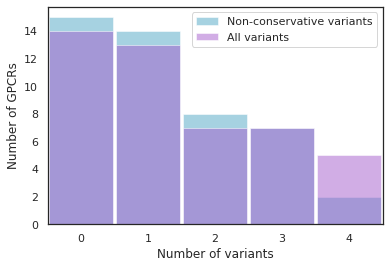

In [81]:
fig, ax = plt.subplots()

sns.barplot(data=abundance_dist_cons_df_cm , x="Count",y="GPCR num",ax=ax,color="#3ab1d8" , alpha=0.5 , label="Non-conservative variants")#blue
sns.barplot(data=abundance_dist_all_df_cm , x="Count",y="GPCR num",ax=ax, color="#a94ae0" , alpha=0.5,label="All variants")#purple

ax.xaxis.set_label_text("Number of variants")
ax.yaxis.set_label_text("Number of GPCRs")


change_width_v(ax, .95)

plt.legend()
plt.show()

In this plot we can see, for example, that there are a total of six GPCRs that present three variants (in total, conservative or non-conservative) and only two GPCRs that present only three non-conservative variants.

In [82]:
order_by_varnum_cm=True
if order_by_varnum:
    (gpcr_bspos,gpcr_bspos_count_df,all_gpcrs_axes)=sorted_var_info_cm(gpcr_bspos,gpcr_bspos_count_df)

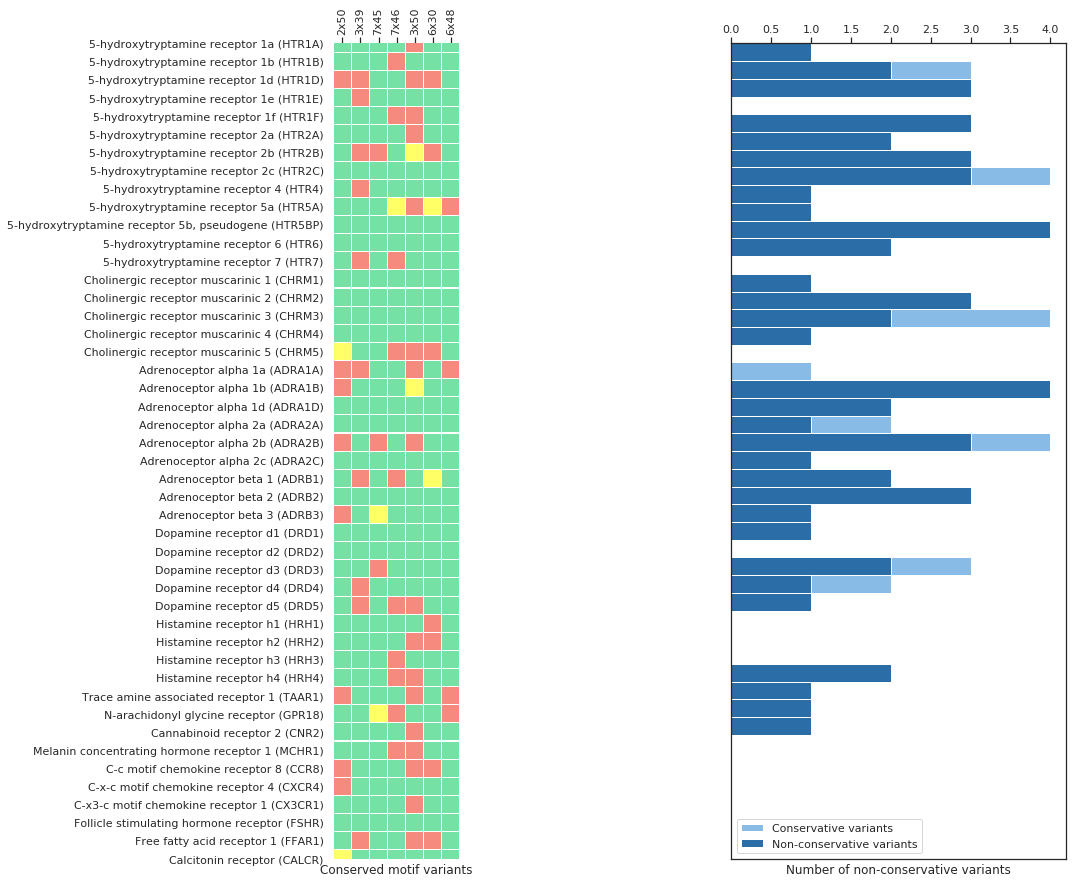

In [83]:
#gs = gridspec.GridSpec(1, 2) 

grid = plt.GridSpec(2, 2, wspace=0, hspace=0, width_ratios=[2, 1])
plt.figure(figsize=(18,30))

ax=plt.subplot(grid[0, 0])
#f, axs = plt.subplots(grid[0, 0],figsize=(15,15))
axA=sns.heatmap(gpcr_cmpos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax)
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_cmpos.columns , rotation=90)
axA.xaxis.set_label_text("Conserved motif variants")

ax2=plt.subplot(grid[0, 1])
axB = sns.barplot(data=gpcr_cmpos_count_all_df , x="Count",y="GPCR",color="#79bcf7",label="Conservative variants")
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of non-conservative variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

ax3=plt.subplot(grid[0, 1])
axB = sns.barplot(data=gpcr_cmpos_count_cons_df , x="Count",y="GPCR",color="#166fbc",label="Non-conservative variants")
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of non-conservative variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

plt.legend()
plt.show()

As in the case of the binding site, the barplots are not in the same order as the heatmap.

### Clustering

In [84]:
# this function can also be directly adapted in cluster_df(), only the last sentece has been changed
def cluster_df_cm(my_df):
    dist_mat_md = squareform(pdist(my_df))
    method="ward"
    res_order, res_linkage = compute_serial_matrix(dist_mat_md,method)

    df_order=[]
    for e in res_order:
        df_order.append(my_df.iloc[e].name)
    return gpcr_cmpos.loc[df_order] 


In [85]:
gpcr_cmpos=cluster_df_cm(gpcr_cmpos)

In [86]:
sorter_cm=gpcr_cmpos.index
gpcr_cmpos_count_df=order_df_by_sorterlist(sorter_cm,gpcr_cmpos_count_df)
gpcr_cmpos_count_cons_df=order_df_by_sorterlist(sorter_cm,gpcr_cmpos_count_cons_df)
gpcr_cmpos_count_all_df=order_df_by_sorterlist(sorter,gpcr_cmpos_count_all_df)

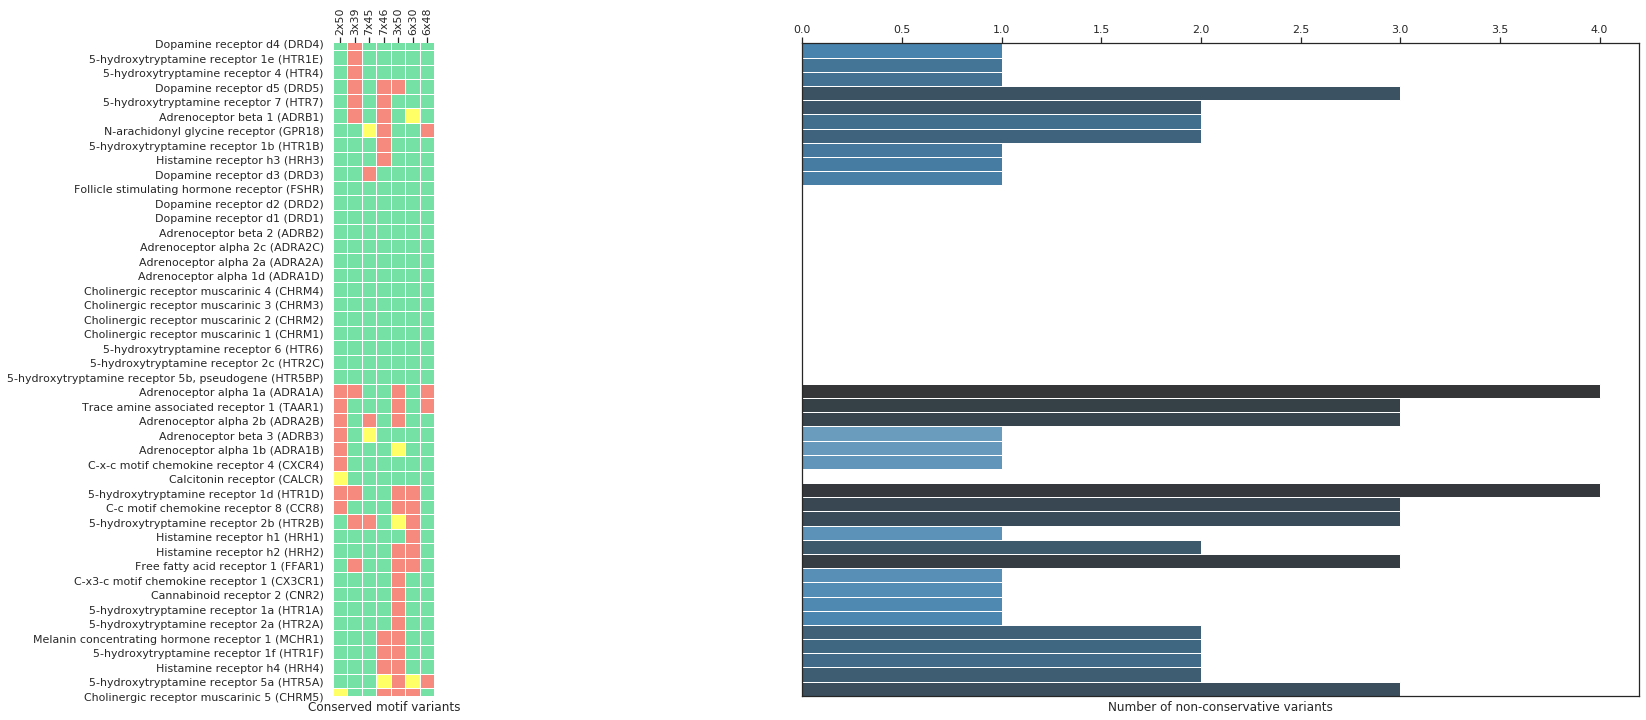

In [87]:
#gpcr_cmpos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,12))
axA=sns.heatmap(gpcr_cmpos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax[0])
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_cmpos.columns , rotation=90)
axA.xaxis.set_label_text("Conserved motif variants")
#axA.xaxis.set_label_position('top') 

#gpcr_cmpos_count_df 
pal = sns.color_palette("Blues_d", len(gpcr_cmpos_count_df))
rank = gpcr_cmpos_count_df["Count"].argsort().argsort() 
axB = sns.barplot(data=gpcr_cmpos_count_df , x="Count",y="GPCR",palette=np.array(pal[::-1])[rank])
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of non-conservative variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [88]:
gpcr_cmpos_count_all_df=order_df_by_sorterlist(sorter_cm,gpcr_cmpos_count_all_df)
gpcr_cmpos_count_cons_df=order_df_by_sorterlist(sorter_cm,gpcr_cmpos_count_cons_df)

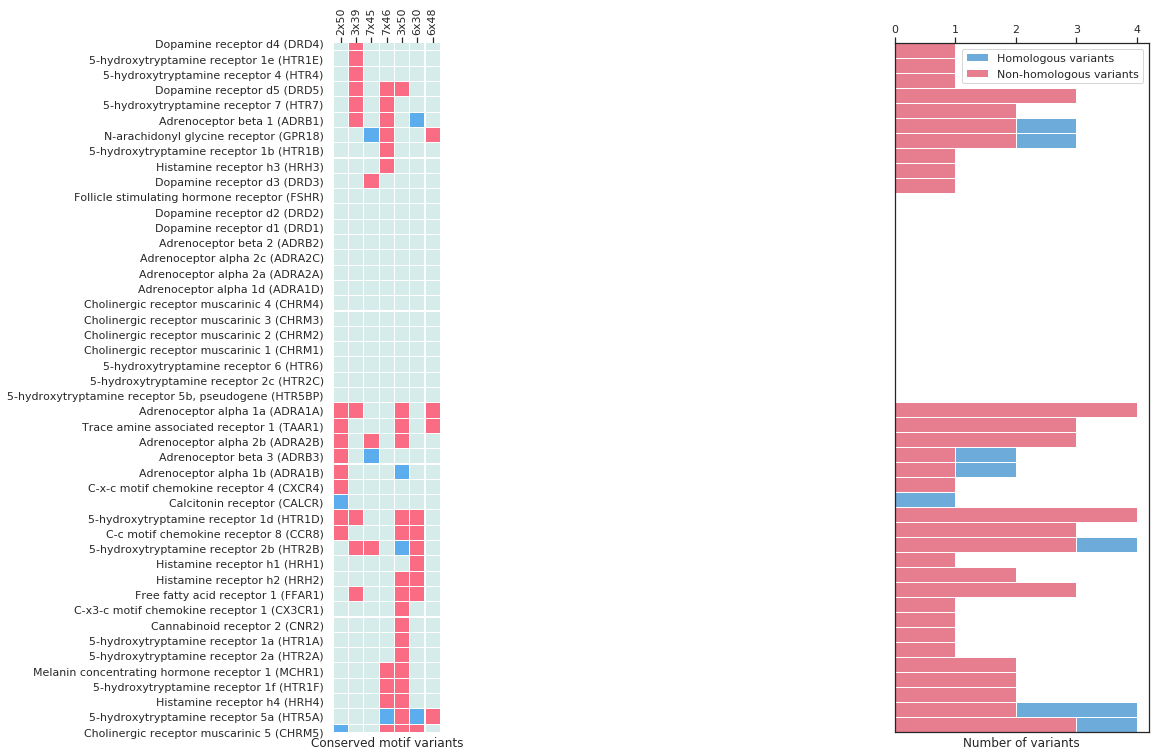

<Figure size 432x288 with 0 Axes>

In [89]:
cmap=["#75E1A5","#ffff66","#F68A7F"]
cmap=["#D5ECEB","#5BADED","#F96C84"]
grid = plt.GridSpec(2, 2, wspace=0, hspace=0, width_ratios=[4, 1])
plt.figure(figsize=(18,20))

ax=plt.subplot(grid[0, 0])
#f, axs = plt.subplots(grid[0, 0],figsize=(15,15))
axA=sns.heatmap(gpcr_cmpos, cmap=cmap, linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax)
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_cmpos.columns , rotation=90)
axA.xaxis.set_label_text("Conserved motif variants")
#axA.xaxis.set_label_position("top")

ax2=plt.subplot(grid[0, 1])
axB = sns.barplot(data=gpcr_cmpos_count_all_df , x="Count",y="GPCR",color="#5BADED",label="Homologous variants")
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

ax3=plt.subplot(grid[0, 1])
axB = sns.barplot(data=gpcr_cmpos_count_cons_df , x="Count",y="GPCR",color="#F96C84",label="Non-homologous variants")
axB.get_yaxis().set_visible(False)
#axB.xaxis.set_major_formatter(FormatStrFormatter('%.f')) # edit this to take out non-integers

axB.xaxis.set_label_text("Number of variants")
axB.xaxis.set_ticks_position('top')
#axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

plt.legend()
plt.tight_layout()

plt.show()
plt.savefig("/home/martalo/Documentos/TFM/GPCR_variants/Results/Binding_site/cm_affected_clustered.png")

We could improve this plot by changing the x axis labels and making the first plot bigger.

Next, we will compute the other histogram, the 'horizontal' one, the number of variants at eag position of the conserved motifs.

In [90]:
gpcr_cmpos_count_bycm_all=dict(zip(consMotifsPos,[0]*len(consMotifsPos)))
gpcr_cmpos_count_bycm_noncons=dict(zip(consMotifsPos,[0]*len(consMotifsPos)))

for cmpos in gpcr_cmpos_count_bycm_all.keys():
    count_all_cm=len([varval for varval in gpcr_cmpos[cmpos].values if varval> 0])
    count_noncons_cm=len([varval for varval in gpcr_cmpos[cmpos].values if varval> 1])
    gpcr_cmpos_count_bycm_all[cmpos]=count_all_cm
    gpcr_cmpos_count_bycm_noncons[cmpos]=count_noncons_cm

gpcr_cmpos_count_bycm_all_df=pd.DataFrame(list(gpcr_cmpos_count_bycm_all.items()),
                      columns=['CM pos','Count'])
gpcr_cmpos_count_bycm_noncons_df=pd.DataFrame(list(gpcr_cmpos_count_bycm_noncons.items()),
                      columns=['CM pos','Count'])

Now, we want to add the information in the 'vertical' histogram about the Onserved motif type, to so we need to add this information into the data frame that builds the histogram, we will use 'gpcr_cmpos_count_bycm_noncons_df' (as the positions are the same in that data frame and 'gpcr_cmpos_count_bycm_all_df' we could have used any of them).

In [91]:
def get_key(val): 
    ''' Obtain the name of the conserved motif type, the key, of the corresponding position
    of the dictionary consMotif'''
    for key, value in consMotif.items(): 
        for pos in value:
            if val == pos: 
                 return key   
    return "key doesn't exist"

# add new column of the df 'noncos' with the conserved motif type info
new_val=[] #buil a list with the names of the conserved motifs names following the order of the df
for index, row in gpcr_cmpos_count_bycm_noncons_df.iterrows():
    for position in consMotifsPos: #iterating over the list of CM positions
        if row['CM pos'] == position:
            new_val.append(get_key(position))
gpcr_cmpos_count_bycm_noncons_df['CM type']= new_val# add value to the new colum of the dataframe 'CM type'
            
print('Positions - Total non-conservarive counts - CM type: \n',gpcr_cmpos_count_bycm_noncons_df, '\n')


# add new column of the df 'all' with the conserved motif type info
new_val_all=[] #buil a list with the names of the conserved motifs names following the order of the df
for index, row in gpcr_cmpos_count_bycm_all_df.iterrows():
    for position in consMotifsPos: #iterating over the list of CM positions
        if row['CM pos'] == position:
            new_val_all.append(get_key(position))
gpcr_cmpos_count_bycm_all_df['CM type']= new_val_all# add value to the new colum of the dataframe 'CM type'
            
print('Positions - Total counts - CM type: \n', gpcr_cmpos_count_bycm_all_df)

Positions - Total non-conservarive counts - CM type: 
   CM pos  Count    CM type
0   2x50      8       naBS
1   3x39     10       naBS
2   7x45      3       naBS
3   7x46     10       naBS
4   3x50     17  ionicLock
5   6x30      7  ionicLock
6   6x48      4    rotTogg 

Positions - Total counts - CM type: 
   CM pos  Count    CM type
0   2x50     10       naBS
1   3x39     10       naBS
2   7x45      5       naBS
3   7x46     11       naBS
4   3x50     19  ionicLock
5   6x30      9  ionicLock
6   6x48      4    rotTogg


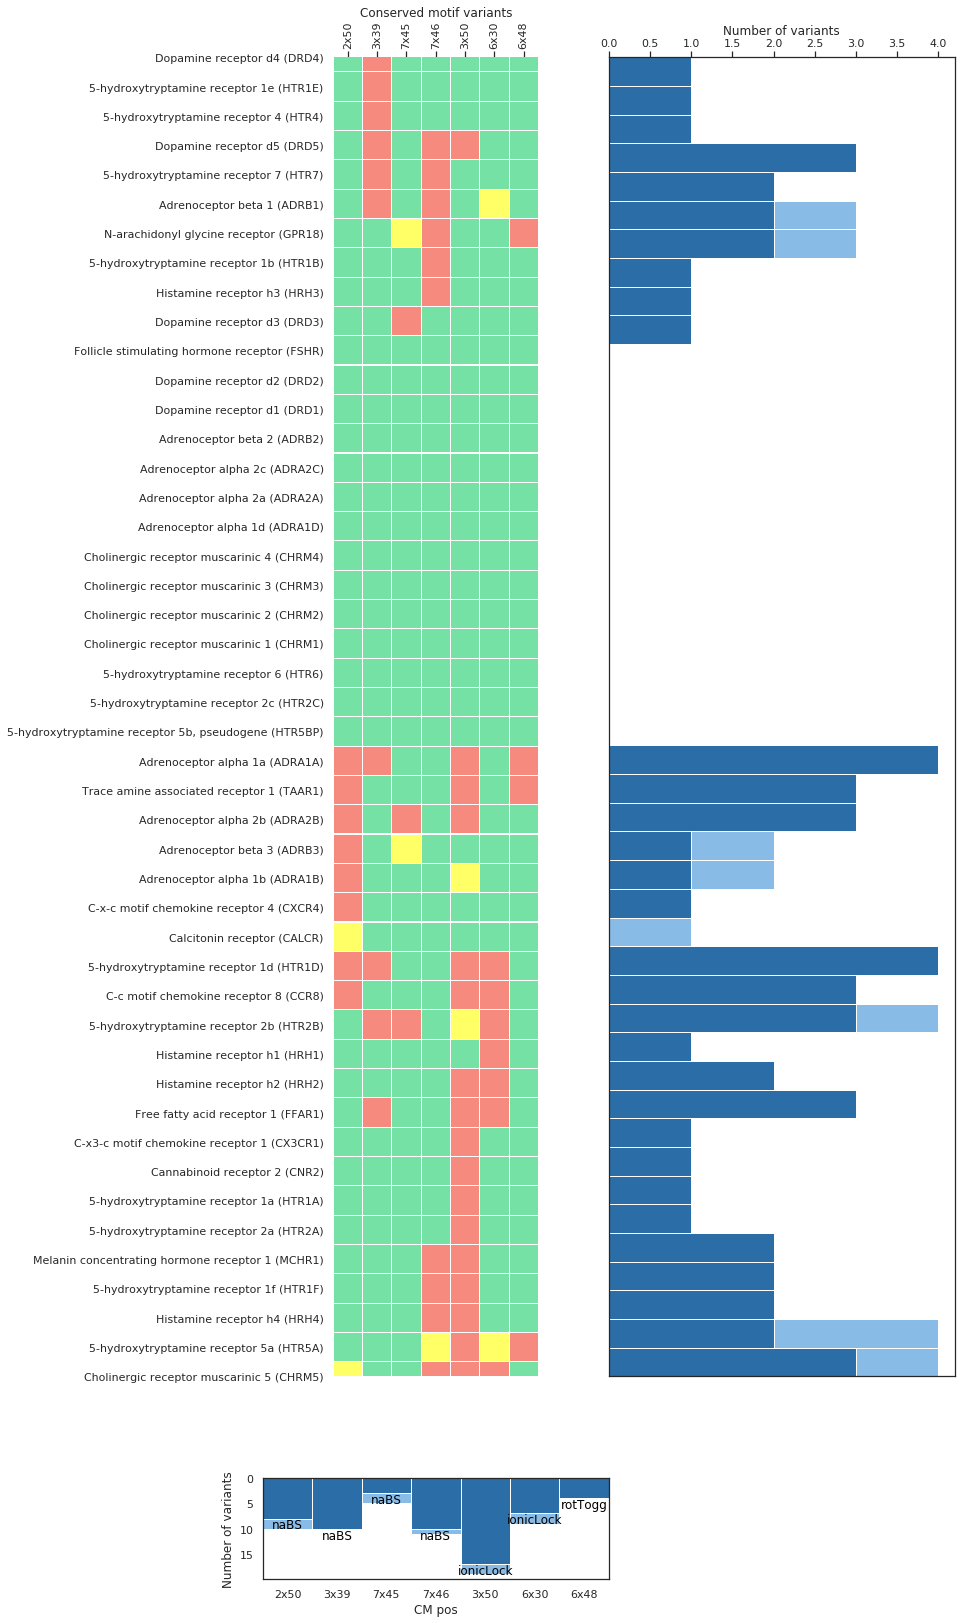

In [92]:
grid = plt.GridSpec(15,5, wspace=0, hspace=0) # 4 rows, two cols
#plt.figure(figsize=(59,75))
plt.figure(figsize=(31,28))

# Heatmap
ax1=plt.subplot(grid[:-2, 0:3]) # rows -> all but the last one, cols -> all but the last one
axA=sns.heatmap(gpcr_cmpos, cmap=["#75E1A5","#ffff66","#F68A7F"], linewidths=0.1, annot=False, cbar=False,square=True,xticklabels=True, yticklabels=True,ax=ax1)
axA.xaxis.set_ticks_position('top')
axA.set_xticklabels(labels=gpcr_cmpos.columns , rotation=90)
axA.xaxis.set_label_text("Conserved motif variants")
axA.xaxis.set_label_position("top")

# Vertical histogram: cons (yellow)
ax2=plt.subplot(grid[:-2, 2:3]) # rows -> all but the last one, cols -> the last one
axB = sns.barplot(data=gpcr_cmpos_count_all_df , x="Count",y="GPCR",color="#79bcf7",label="Conservative variants",ax=ax2)
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of variants")
axB.xaxis.set_ticks_position('top')
axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

# Vertical histogram: non-cons (red)
ax2=plt.subplot(grid[:-2, 2:3]) # rows -> all but the last one, cols -> the last one
axB = sns.barplot(data=gpcr_cmpos_count_cons_df , x="Count",y="GPCR",color="#166fbc",label="Non-conservative variants",ax=ax2)
axB.get_yaxis().set_visible(False)
axB.xaxis.set_label_text("Number of variants")
axB.xaxis.set_ticks_position('top')
axB.xaxis.set_label_position('top') 
change_width_h(axB, 1)

# Horizontal histogram: cons (yellow cells)
ax3=plt.subplot(grid[-1, 1:2]) # rows -> the last one, cols -> all but the last one
axB = sns.barplot(data=gpcr_cmpos_count_bycm_all_df , y="Count",x="CM pos",color="#79bcf7",label="Conservative variants",ax=ax3)
#axB.get_xaxis().set_visible(False)
axB.yaxis.set_label_text("Number of variants")
axB.invert_yaxis()
change_width_v(axB, 1)

# Horizontal histogram: non-cons (red cells)
ax3=plt.subplot(grid[-1, 1:2]) # rows -> the last one, cols -> all but the last one
axB = sns.barplot(data=gpcr_cmpos_count_bycm_noncons_df , y="Count",x="CM pos",color="#166fbc",label="Non-conservative variants",ax=ax3)
#axB.get_xaxis().set_visible(False)
axB.yaxis.set_label_text("Number of variants")
#axB.invert_yaxis()
change_width_v(axB, 1)

for index, row in gpcr_cmpos_count_bycm_noncons_df.iterrows():
    axB.text(row.name,row['Count'], row['CM type'], color='black', ha="center", va='top')

#plt.tight_layout()


plt.show()

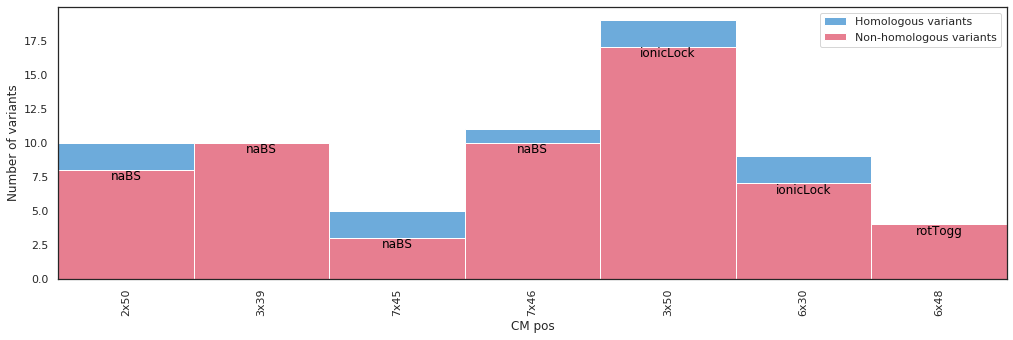

<Figure size 432x288 with 0 Axes>

In [93]:
#cmap=["#D5ECEB","#5BADED","#F96C84"]

fig, ax = plt.subplots(figsize=(17,5))
axB = sns.barplot(data=gpcr_cmpos_count_bycm_all_df , y="Count",x="CM pos",color="#5BADED",label="Homologous variants",ax=ax)
axB.set_xticklabels(labels=gpcr_cmpos.columns , rotation=90)
#axB.get_xaxis().set_visible(False)
axB.yaxis.set_label_text("Number of variants")
#axB.invert_yaxis()
change_width_v(axB, 1)

axB = sns.barplot(data=gpcr_cmpos_count_bycm_noncons_df , y="Count",x="CM pos",color="#F96C84",label="Non-homologous variants",ax=ax)
#axB.get_xaxis().set_visible(False)
axB.yaxis.set_label_text("Number of variants")
change_width_v(axB, 1)

for index, row in gpcr_cmpos_count_bycm_noncons_df.iterrows():
    axB.text(row.name,row['Count'], row['CM type'], color='black', ha="center", va='top')


plt.legend()
plt.show()
plt.savefig("/home/martalo/Documentos/TFM/GPCR_variants/Results/Binding_site/cm_count_pos.png")

### Differenciation of conserved motifs
We could aslo make the differenciation of each of the three conserved motif types: sodium binding site, ionic lock and rotamer toggle switch. To do so, we will create two new dataframes with only the data of the counts for each conserved motif type. 

In [94]:
gpcr_all_cmtype_freq= pd.DataFrame(data=[])
gpcr_concons_cmtype_freq= pd.DataFrame(data=[])

# sum the counts of each one and add the info as a new column
gpcr_all_cmtype_freq=gpcr_cmpos_count_bycm_all_df.groupby(['CM type']).sum()
gpcr_concons_cmtype_freq=gpcr_cmpos_count_bycm_noncons_df.groupby(['CM type']).sum()

# sort by Count

gpcr_all_cmtype_freq=gpcr_all_cmtype_freq.sort_values(by=['Count'], ascending=False)
gpcr_concons_cmtype_freq=gpcr_concons_cmtype_freq.sort_values(by=['Count'], ascending=False)


print(gpcr_all_cmtype_freq)
print(gpcr_concons_cmtype_freq)

           Count
CM type         
naBS          36
ionicLock     28
rotTogg        4
           Count
CM type         
naBS          31
ionicLock     24
rotTogg        4


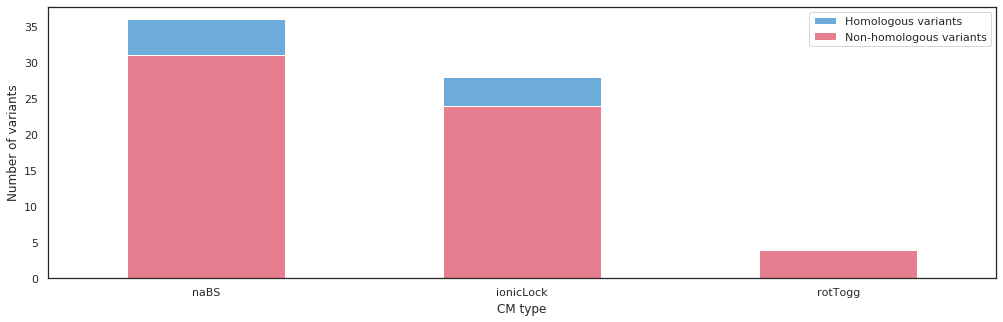

<Figure size 432x288 with 0 Axes>

In [95]:
fig, ax = plt.subplots(figsize=(17,5))
axB = sns.barplot(data=gpcr_all_cmtype_freq, y="Count", x=gpcr_all_cmtype_freq.index,color="#5BADED",label="Homologous variants",ax=ax)
axB.yaxis.set_label_text("Number of variants")
change_width_v(axB, 1)

axB = sns.barplot(data=gpcr_concons_cmtype_freq , y="Count",x=gpcr_concons_cmtype_freq.index, color="#F96C84",label="Non-homologous variants",ax=ax)
axB.yaxis.set_label_text("Number of variants")
change_width_v(axB, 0.5)


plt.legend()
plt.show()
plt.savefig("/home/martalo/Documentos/TFM/GPCR_variants/Results/Binding_site/cm_type_freq.png")

We can see that the majority of the variants are in the Sodium Binding Site motif, but this makes sense as it is the motif with more defined positions. 

# Interesting positions to mutate and simulate of Conserved Motifs
We have seen than position 3x50 of the Ionic Lock is the one with more non-homologous variants so we will store the info of those variants in two files.
1. First we will store the 'short info', that is ex: {'affected_pred': False, 'affected_items_pred': [], 'pdb_pos': {'aa': 'V', 'pos': '31', 'chain': 'A'}, 'gpcr_num': '1x36', 'aa_type_changed': False} -> obtained with the function 'var_to_display'. We will store this info of all the non-homolous varians detected in position 3x50 of the 46 GPCRs (17).

In [96]:
resultspath_var="/home/martalo/Documentos/TFM/GPCR_variants/Results/studied_GPCR_vars/filtered_var_list"
pp=re.compile(".*\((\w*)\)")

# Print 'short' info of the non-homologous variant in a file
with open(os.path.join(resultspath_var,'myvar_list_cm_short.txt'), 'w') as outfile:
    for gpcrname in all_gpcrs_axes_cm:# iteration over the 46 GPCRs
        gpcr_cm=re.search(pp,gpcrname).group(1) # search and store the short names of the GPCRS        
        gpcr_vars_cm=var_to_display(ex_gpcr=gpcr_cm,dictpath=dictpath) # function in 'create_csv',
        # returns list of variats for the GPCR 'gpcr_cm' (short info, organized) 
        if gpcr_vars_cm:# if there are variants in the GPCR
            potential_vars={}
            for var in gpcr_vars_cm:# iteration over the variants of the GPCR
                gnum_cm=var["gpcr_num"] # store the position of the variant
                var_type_cm=var["aa_type_changed"]
                if gnum_cm=='3x50'and var_type_cm:
                    outfile.write(json.dumps(var))
outfile.close()    

No pdb found for HTR5BP


2. Now, we will store the 'long info' of the same variants in another file. Ex: {'gpcrdb': '3.50x50', 'seqN': '134', 'var_aa': 'R', 'wt_aa': 'S', 'sift_poloP': True, 'DisGeNet_disease': False, 'gprotInt': True, 'arrestinInt': True, 'activation': False, 'microSwitch': True, 'sodiumP': False, 'ptm': False, 'interact': False}

In [97]:
#write the non-homologous variant 'long info' of positions 3x50 
with open(os.path.join(resultspath_var,'myvar_list_cm_long.txt'), 'w') as outfile:
    for gpcrname in all_gpcrs_axes_cm:# iteration over the 46 GPCRs
        gpcr_cm=re.search(pp,gpcrname).group(1) # search and store the short names of the GPCRS        
        outfile.write(json.dumps(var_to_display_in_file('3x50',gpcr_cm))) # write dictionary in the file


HTR1A
{'gpcrdb': '3.50x50', 'seqN': '134', 'var_aa': 'R', 'wt_aa': 'S', 'sift_poloP': True, 'DisGeNet_disease': False, 'gprotInt': True, 'arrestinInt': True, 'activation': False, 'microSwitch': True, 'sodiumP': False, 'ptm': False, 'interact': False}
HTR1B
HTR1D
{'gpcrdb': '3.50x50', 'seqN': '136', 'var_aa': 'R', 'wt_aa': 'T', 'sift_poloP': True, 'DisGeNet_disease': False, 'gprotInt': True, 'arrestinInt': True, 'activation': False, 'microSwitch': True, 'sodiumP': False, 'ptm': False, 'interact': False}
HTR1E
HTR1F
{'gpcrdb': '3.50x50', 'seqN': '121', 'var_aa': 'R', 'wt_aa': 'Q', 'sift_poloP': True, 'DisGeNet_disease': False, 'gprotInt': True, 'arrestinInt': True, 'activation': False, 'microSwitch': True, 'sodiumP': False, 'ptm': False, 'interact': False}
HTR2A
{'gpcrdb': '3.50x50', 'seqN': '173', 'var_aa': 'R', 'wt_aa': 'C', 'sift_poloP': True, 'DisGeNet_disease': False, 'gprotInt': True, 'arrestinInt': True, 'activation': False, 'microSwitch': True, 'sodiumP': False, 'ptm': False, 'in